In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [74]:
data=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.1
c_reg2=0.0001

<tf.Variable 'Shape/Variable:0' shape=(10,) dtype=float64, numpy=
array([-0.11172713,  0.86055829, -0.32877697, -0.31139828,  0.97972377,
       -0.29926592,  2.48426276,  3.14743939,  5.19812358,  8.7133742 ])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


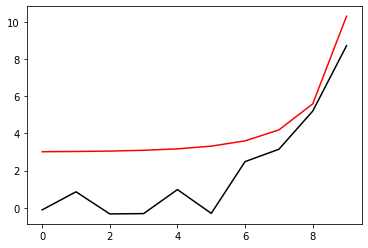

In [85]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [86]:
m2=tf.constant(np.float64(-1.0))
m2_2=tf.Variable(np.float64(np.random.uniform(-1.5, -0.5)))
print(m2_2)

<tf.Variable 'Shape/Variable:0' shape=() dtype=float64, numpy=-1.071165098700844>


In [57]:
phi=tf.Variable(tf.zeros(1))
pi=tf.Variable(tf.zeros(1))

def F_func(m, a,b):
    return 2*b/n_fin-m*a-lam*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [58]:
def LP2(hh, m, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*lam*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh, m):
    Positive=[]
    while len(Positive)<data:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, m, phi1, pi1)
        for i in range (10000):
            if len(Positive)>=100: break
            if tf.math.abs(F_func(m, phi_1[i], pi_1[i]))<0.1: Positive.append([phi1[i], pi1[i]])
            else: continue
    return Positive
def NN_func_n(hh, m):
    Negative=[]
    while len(Negative)<data:
        phi1=np.random.uniform(0.0, 1.5, 200)
        pi1=np.random.uniform(-0.2, 0.2, 200)
        phi_1, pi_1 = LP2(hh, m, phi1, pi1)
        for i in range (200):
            if len(Negative)>=100: break
            if tf.math.abs(F_func(m, phi_1[i], pi_1[i]))>=0.1: Negative.append([phi1[i], pi1[i]])
            else: continue
    return Negative
def NN_func_01(hh, m, list1):
    PP=[]
    NN=[]
    for i in range (data):
        phi=list1[i][0]
        pi=list1[i][1]
        if tf.math.abs(LP2(hh, m, phi, pi)[1])<0.1: PP.append([phi, pi])
        else: NN.append([phi, pi])
    return PP, NN

In [59]:
for i in range (10):
    Positive[i]=NN_func_p(h_real, m2)
    Negative[i]=NN_func_n(h_real, m2)

In [60]:
for i in range (10):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2_2, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2_2, Negative[i])

In [24]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (10):
    Positive0.insert(i, NN_func_01(h, m2_2, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, m2_2, Negative[i])[0])
    Negative0.insert(i, NN_func_01(h, m2_2, Positive[i])[1])
    Negative1.insert(i, NN_func_01(h, m2_2, Negative[i])[1])

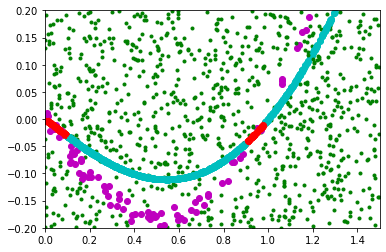

In [61]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (10):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [62]:
def Error_func(hh, m, list1, list2):
    phi0=np.array([v[0] for v in list1])
    pi0=np.array([v[1] for v in list1])
    phi1=np.array([v[0] for v in list2])
    pi1=np.array([v[1] for v in list2])
    phi_0, pi_0=LP2(hh, m, phi0, pi0)
    phi_1, pi_1=LP2(hh, m, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)
    sum_n=data-sum(NNlist)

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [63]:
for i in range (10):
    print(Error_func(h_real, m2, Positive[i], Negative[i]))
for i in range (10):
    print(Error_func(h, m2_2, Positive[i], Negative[i]))

tf.Tensor(1.3506230587878472, shape=(), dtype=float64)
tf.Tensor(4.998984686366347, shape=(), dtype=float64)
tf.Tensor(6.71367079117224, shape=(), dtype=float64)
tf.Tensor(3.125250227455065, shape=(), dtype=float64)
tf.Tensor(1.1514908747671715, shape=(), dtype=float64)
tf.Tensor(3.4242477412954977, shape=(), dtype=float64)
tf.Tensor(2.000721951117032, shape=(), dtype=float64)
tf.Tensor(1.021606455007302, shape=(), dtype=float64)
tf.Tensor(0.0007228498718775458, shape=(), dtype=float64)
tf.Tensor(3.2458238559388723, shape=(), dtype=float64)
tf.Tensor(84.04726570849762, shape=(), dtype=float64)
tf.Tensor(89.39620821817624, shape=(), dtype=float64)
tf.Tensor(87.47008723737699, shape=(), dtype=float64)
tf.Tensor(98.8501186239331, shape=(), dtype=float64)
tf.Tensor(95.98784237250241, shape=(), dtype=float64)
tf.Tensor(96.52062867239277, shape=(), dtype=float64)
tf.Tensor(93.29024384160316, shape=(), dtype=float64)
tf.Tensor(96.73246998171977, shape=(), dtype=float64)
tf.Tensor(90.517357005

In [87]:
def run(i):
    with tf.GradientTape() as g:
        loss=Error_func(h, m2_2, Positive[i], Negative[i])
        gradients=g.gradient(loss, [h, m2_2])
    optimizer.apply_gradients(zip(gradients, [h, m2_2]))

201 95.01783805339898 -1.0649626504173584
[ 0.01852032  0.94031989 -0.20487749 -0.20656677  1.02761605 -0.24527231
  2.44011528  3.07883495  5.11158463  8.51625113]


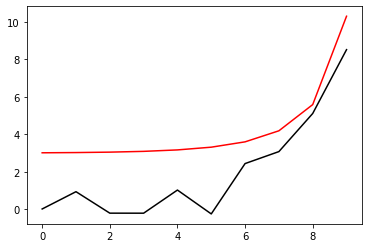

402 91.90693120045742 -1.062089422084657
[ 0.10213838  0.96958649 -0.12520051 -0.14849537  1.01620975 -0.2537547
  2.33320182  2.95602231  4.97967263  8.32593626]


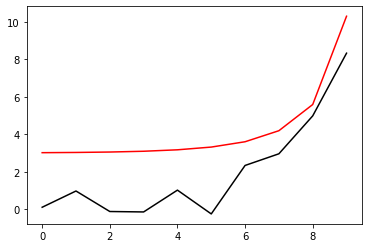

603 93.90468786870255 -1.05742139281889
[ 0.18693595  0.9955139  -0.0504522  -0.10236941  0.98467338 -0.28871212
  2.21910007  2.82871051  4.84350139  8.14170451]


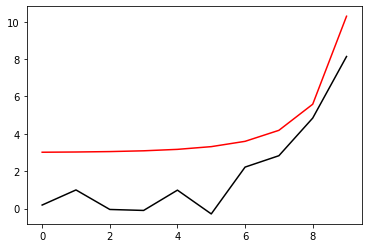

804 94.96282076805373 -1.0418218612622325
[ 0.32359861  1.08053525  0.06694044 -0.02155509  0.97482443 -0.32159142
  2.10247993  2.69106689  4.69281263  7.96251045]


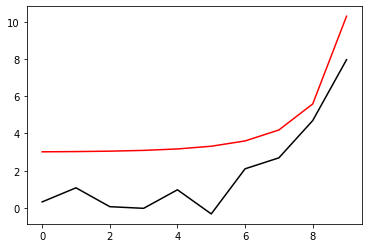

1005 101.20423706164046 -1.0378329140009614
[ 0.47778562  1.19925253  0.21639554  0.10033624  1.00864673 -0.32446517
  2.0030022   2.56040719  4.54274579  7.78784702]


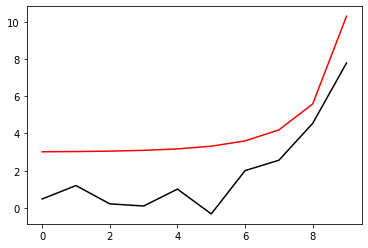

1206 91.89592146341944 -1.0289357182935894
[ 0.6480006   1.33996278  0.37566635  0.23600742  1.07378885 -0.29337377
  1.93869107  2.46106639  4.42188828  7.61914831]


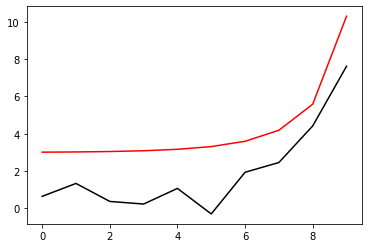

1407 92.41857495354311 -1.0262286254411042
[ 0.73018841  1.38035227  0.44467311  0.27877274  1.04757275 -0.3369139
  1.827607    2.33624871  4.28973167  7.45669264]


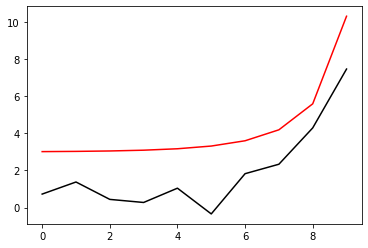

1608 92.04263587807218 -1.0232053947770852
[ 0.79047659  1.39496559  0.48885391  0.29384783  0.98841747 -0.41203208
  1.69380116  2.1961635   4.1470204   7.29869831]


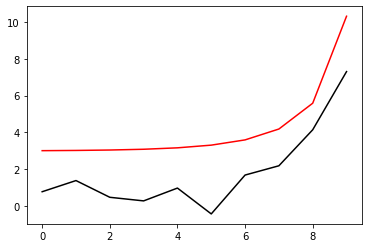

1809 87.17335721934221 -1.0220660406881183
[ 0.84456004  1.4049232   0.52858844  0.30780012  0.93542791 -0.47616775
  1.57498551  2.07051422  4.01765755  7.14500115]


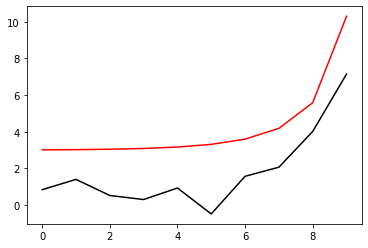

2010 86.01407806254379 -1.0219376785875003
[ 0.88233004  1.40513433  0.56214087  0.32436162  0.90103469 -0.51285704
  1.4872861   1.97337637  3.91418102  6.99767905]


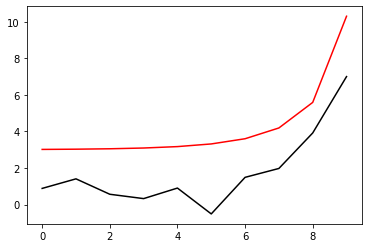

2211 87.02458713369367 -1.0226988122400726
[ 0.92194359  1.41138589  0.59926386  0.34801858  0.88197192 -0.53201587
  1.41828423  1.89200662  3.82416843  6.85835823]


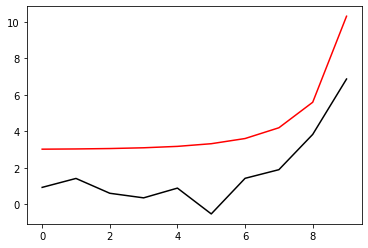

2412 88.64464978185356 -1.0228639425424153
[ 0.97233569  1.42821197  0.64160372  0.37590545  0.8691535  -0.54583589
  1.35575595  1.81567794  3.73819854  6.7272567 ]


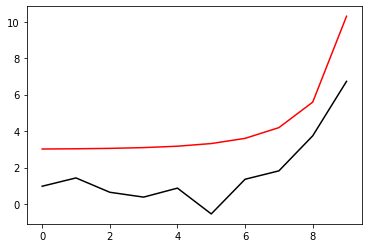

2613 93.33625852423667 -1.0229584319376879
[ 1.02732061  1.44949306  0.68520725  0.40407336  0.85692617 -0.56028164
  1.29335038  1.73845761  3.65054842  6.60390812]


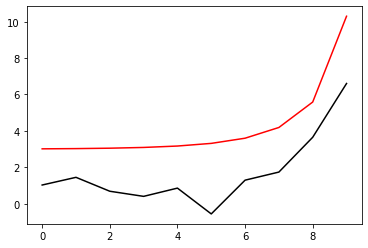

2814 91.31243269166667 -1.0225590142832488
[ 1.09632865  1.48538178  0.74059263  0.44170378  0.85005642 -0.57503654
  1.22507437  1.6505451   3.54902186  6.48681194]


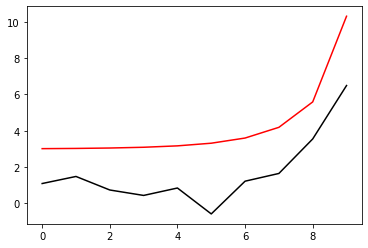

3015 102.60003114628545 -1.0216495371574503
[ 1.17973327  1.53673848  0.80870514  0.48896361  0.84609809 -0.59426769
  1.14509008  1.54683739  3.42959522  6.37323746]


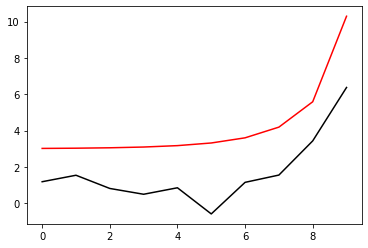

3216 90.14973645597745 -1.0241293455638758
[ 1.27522418  1.60072316  0.88562689  0.54294628  0.84559117 -0.6141319
  1.06122879  1.4381213   3.30526239  6.26157164]


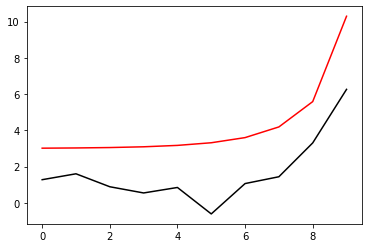

3417 86.41609229458163 -1.0249946650867876
[ 1.34757126  1.64013096  0.93618121  0.56952732  0.81904457 -0.65879906
  0.95742283  1.3126353   3.16708034  6.15041288]


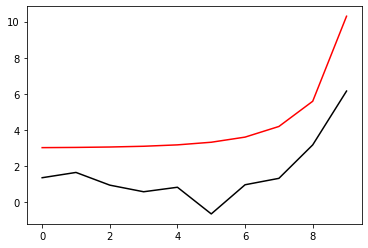

3618 88.00697022214655 -1.0273556588099302
[ 1.4063894   1.66998263  0.97923253  0.59338001  0.79733436 -0.69454888
  0.86551887  1.1973216   3.03708365  6.04027267]


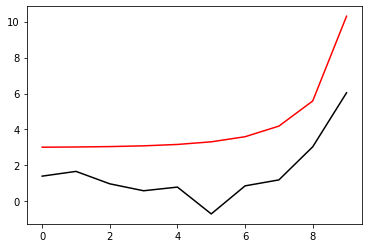

3819 84.31893447984095 -1.0305908062163591
[ 1.53269664  1.76114202  1.068219    0.65309043  0.80141038 -0.71717153
  0.77396195  1.07126355  2.88910549  5.93050024]


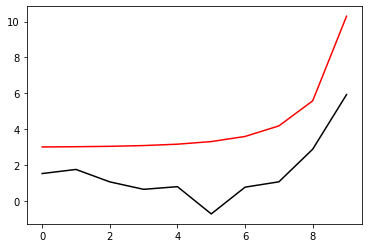

4020 86.68127939657569 -1.0304007986767125
[ 1.66425469  1.86148746  1.1658623   0.72131227  0.81135565 -0.73723998
  0.68161492  0.94375557  2.74011996  5.81931799]


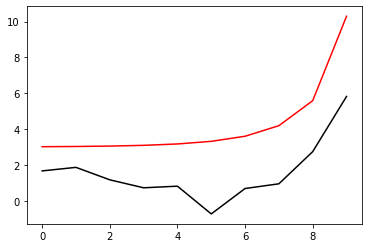

4221 79.47428987732432 -1.0218768414562254
[ 1.87057497  2.05184175  1.35357028  0.88565372  0.91777829 -0.67754884
  0.63352662  0.82953243  2.58406017  5.70802513]


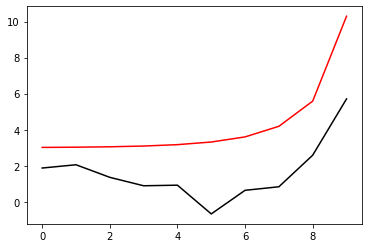

4422 34.64582343391599 -0.8384140716662241
[ 2.30017071  2.48790533  1.77928446  1.29302984  1.26930992 -0.42961221
  0.62548822  0.60606548  2.25170666  5.57929746]


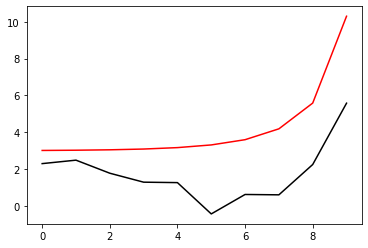

4623 26.058057330324523 -0.8702203678452534
[ 2.37237098  2.56062477  1.86886503  1.38840939  1.35948346 -0.33439176
  0.65133615  0.55629668  2.16472839  5.44328977]


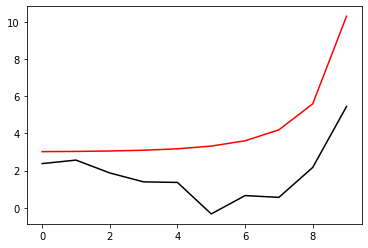

4824 30.688755027051418 -0.8917122282608899
[ 2.48058898  2.67101155  1.99509821  1.52037675  1.48649031 -0.20670728
  0.6959271   0.49597311  2.05144262  5.32655078]


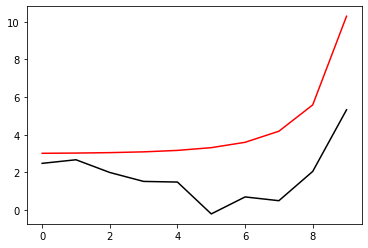

In [88]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 5001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 21.366451641144277 -0.9360336464543101
[2.77252978 2.9664104  2.30430812 1.83758053 1.80691405 0.12248571
 0.95788668 0.53919035 1.89417783 5.10194881]


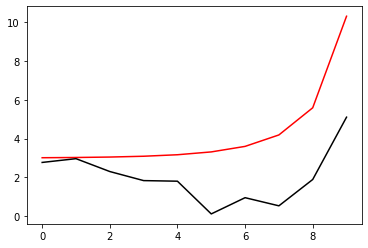

402 28.94579943097896 -0.9620648322898565
[2.93998416 3.13279591 2.46902474 1.99985759 1.96505977 0.27334428
 1.08051665 0.54906376 1.77376241 5.00166069]


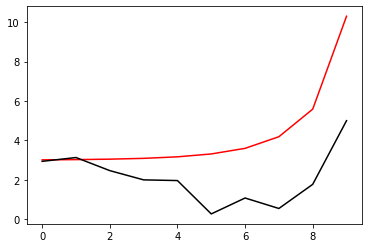

603 8.332147113300714 -0.9933968993767549
[3.15396818 3.34198063 2.67123562 2.19662292 2.15696204 0.45656072
 1.24155482 0.58409261 1.65075654 4.91198505]


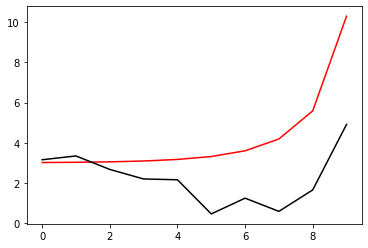

804 4.738435664283047 -1.0008607698812717
[3.27531609 3.45919318 2.78735995 2.31180684 2.27239394 0.57826994
 1.37599584 0.71399092 1.66099692 4.86253398]


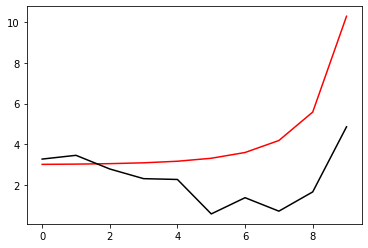

1005 8.425248489681353 -0.9989322576449983
[3.29887038 3.48119119 2.81576504 2.34427503 2.30855737 0.63119448
 1.45341092 0.84329372 1.75253126 4.90080019]


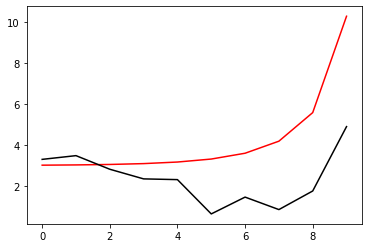

1206 6.619778007675899 -0.9970910238779964
[3.30958199 3.49016121 2.83262037 2.36582107 2.33363636 0.67462486
 1.51920966 0.95489871 1.8445985  4.95958728]


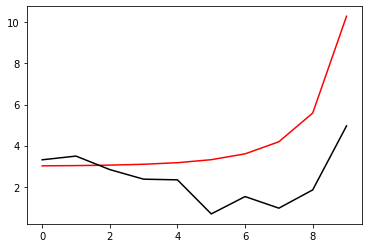

1407 3.937634987111535 -0.9921923262054456
[3.32366189 3.50206009 2.85310966 2.39157519 2.36357278 0.72504622
 1.59381056 1.07324334 1.94719735 5.02124242]


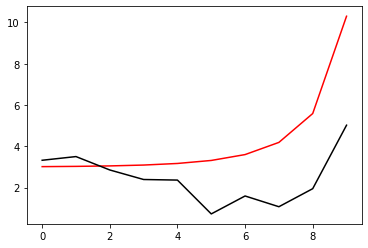

1608 4.088098370210605 -0.9891673185973938
[3.34724344 3.52292758 2.88278982 2.42699378 2.40402579 0.78759113
 1.68166713 1.19933887 2.05839701 5.09221468]


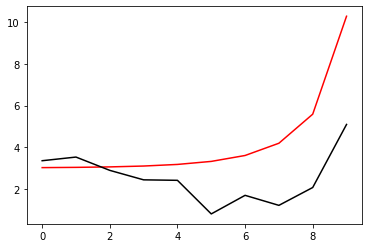

1809 4.476893849624904 -0.9881969680226225
[3.35307756 3.52626827 2.89662266 2.44733168 2.42906398 0.83601524
 1.75230358 1.30469643 2.15864457 5.15814141]


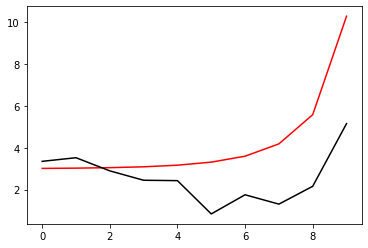

2010 5.344831206928939 -0.9884337938791623
[3.34609466 3.51614654 2.89748407 2.45449653 2.43973514 0.87094194
 1.80708471 1.39393586 2.24960712 5.21660647]


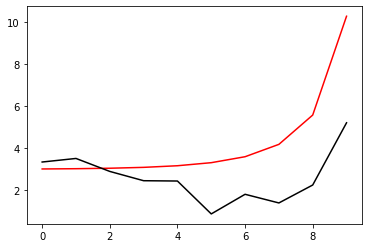

2211 7.156637092089413 -0.9889912955407111
[3.33645056 3.50291867 2.89546286 2.458871   2.44741008 0.90452324
 1.86121926 1.48339984 2.34170909 5.27420953]


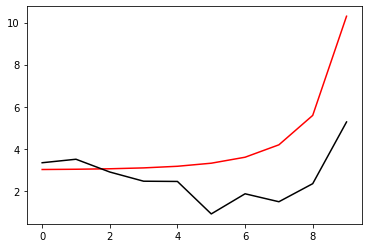

2412 13.667815587843572 -0.9893214911107548
[3.3279123  3.4908213  2.89501031 2.46543591 2.45803723 0.94345478
 1.92340117 1.58184582 2.44106742 5.33534197]


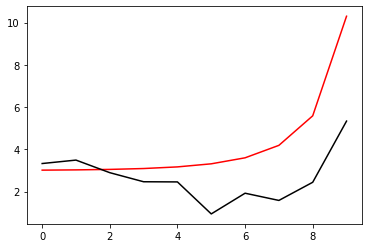

2613 5.396013361567408 -0.9886242966267931
[3.32548301 3.48599706 2.90316407 2.4825267  2.48190953 0.99920486
 2.00763611 1.70168087 2.55634167 5.4049415 ]


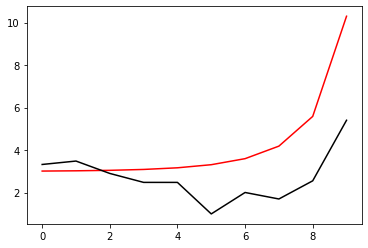

2814 3.8507123595077974 -0.9869636339132892
[3.32996054 3.49017472 2.92233941 2.51346952 2.52356621 1.07599001
 2.11732777 1.84456992 2.69079675 5.48763367]


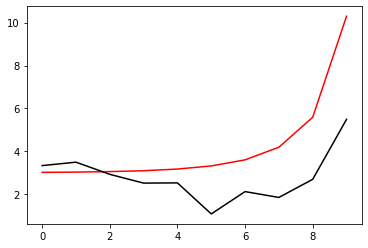

3015 5.183732035225948 -0.9845019240156478
[3.3364563  3.49667675 2.94408371 2.54760844 2.56933732 1.1574682
 2.23112878 1.98882379 2.82820398 5.57221112]


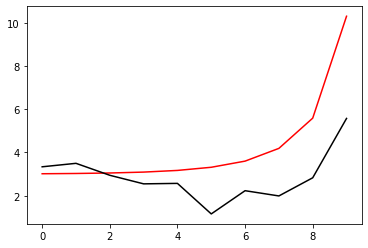

3216 3.208867636162774 -0.98203120787306
[3.35223368 3.51381346 2.97756977 2.59467165 2.62904791 1.25119905
 2.35220694 2.13173732 2.96222025 5.65801816]


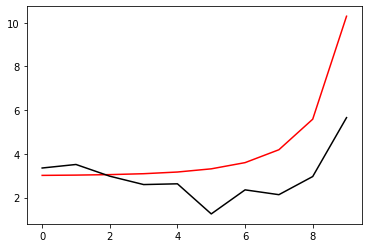

3417 2.862271480995484 -0.9822083404345655
[3.34293225 3.50492645 2.98491663 2.61475477 2.65934891 1.31417046
 2.43619125 2.23848442 3.06987189 5.72638479]


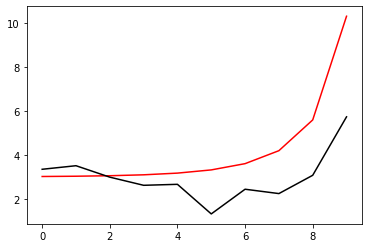

3618 1.7149301095005902 -0.9829285517625809
[3.32323405 3.48523178 2.98199952 2.62493777 2.67955634 1.36828542
 2.51039768 2.33642852 3.17205951 5.79007594]


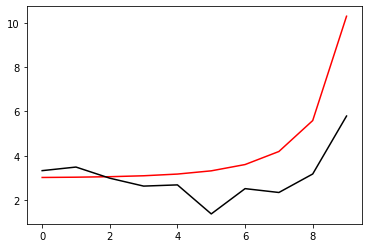

3819 4.155132380925943 -0.9841296227259958
[3.29355181 3.45562308 2.97012906 2.62739298 2.69322697 1.41892033
 2.58299786 2.43500743 3.27719891 5.85513796]


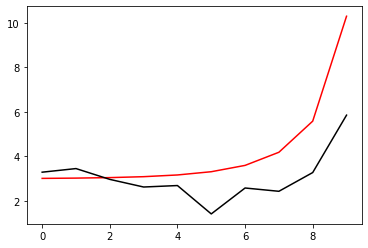

4020 2.1836386271594823 -0.9850601082770312
[3.26812192 3.4299923  2.96197612 2.63367167 2.71085339 1.4742195
 2.65975662 2.53607756 3.38334308 5.9211962 ]


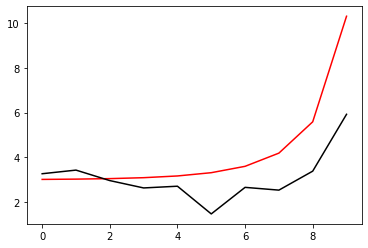

4221 7.21022854452226 -0.9854496333618219
[3.25202278 3.41338393 2.96214449 2.6478023  2.73577014 1.53606857
 2.74100379 2.63816903 3.4876587  5.98603813]


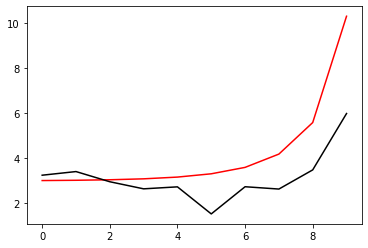

4422 9.23372400570885 -0.9853228178735232
[3.24127013 3.40242612 2.96778517 2.66738688 2.76600063 1.6025991
 2.82535544 2.74092037 3.59080952 6.05020092]


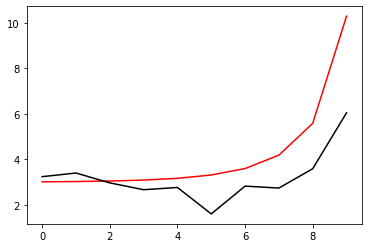

4623 4.209798252108274 -0.9855603435585065
[3.22695467 3.38752743 2.96829528 2.68061179 2.7882356  1.65985202
 2.89875618 2.83382296 3.68597499 6.10974499]


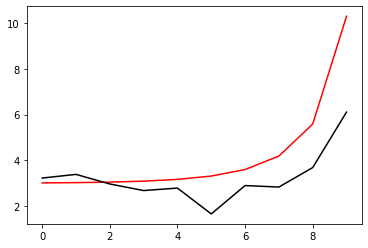

4824 2.106135514539432 -0.9863413448300472
[3.209455   3.36864327 2.96307953 2.6864132  2.80114784 1.70664768
 2.96087073 2.91769989 3.77439018 6.16465406]


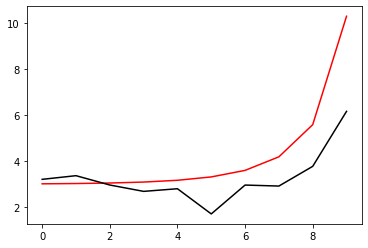

In [89]:
optimizer=tf.optimizers.Adam(learning_rate=0.00075)
for i in range (1, 5001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 6.526625754579605 -0.9880845471796488
[3.18155204 3.33865108 2.95080815 2.68871089 2.81325034 1.77152362
 3.05878049 3.06578829 3.92939671 6.26331543]


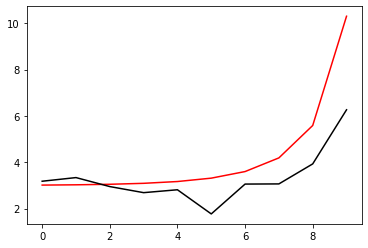

402 8.98649543445487 -0.9885975242017838
[3.17103652 3.32719793 2.94593033 2.6891994  2.81730755 1.7981392
 3.1023977  3.13684539 4.0029897  6.30885516]


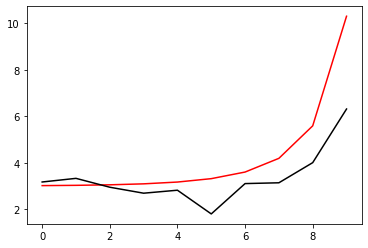

603 3.00172174811072 -0.988922339890387
[3.16211825 3.31695099 2.9419149  2.69008527 2.82109457 1.82375936
 3.14359366 3.20459154 4.07309429 6.35210229]


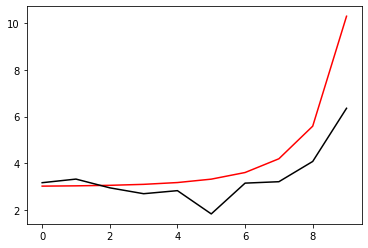

804 2.0238954756756664 -0.98921287585909
[3.15458316 3.30765823 2.9385191  2.69112725 2.82434652 1.84823813
 3.18225001 3.26906508 4.1397468  6.39319722]


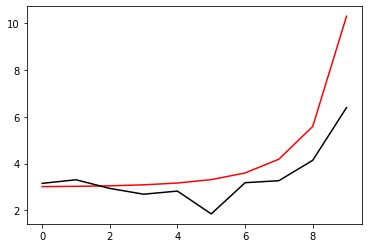

1005 4.092742291047301 -0.9895596564346948
[3.14774524 3.29870126 2.93522332 2.69192984 2.82682102 1.87164832
 3.21884686 3.33115323 4.2039072  6.43274593]


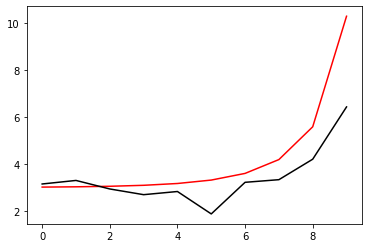

1206 2.1133973919677564 -0.9900065361815437
[3.14079705 3.28941622 2.93153289 2.69220878 2.82850293 1.89439069
 3.2543692  3.3922401  4.26702313 6.47163898]


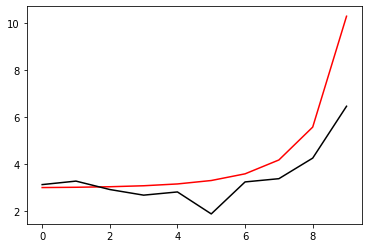

1407 1.7742191558769236 -0.9907177702435264
[3.13230358 3.2786341  2.92656935 2.69144139 2.82932812 1.91701553
 3.29029201 3.45438618 4.331364   6.51125458]


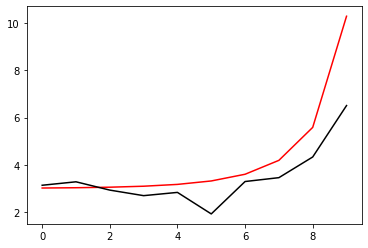

1608 0.5649144760347058 -0.9925507386364046
[3.11672838 3.26161814 2.91638082 2.68661525 2.82747401 1.93914857
 3.32861513 3.52172903 4.40228412 6.55484835]


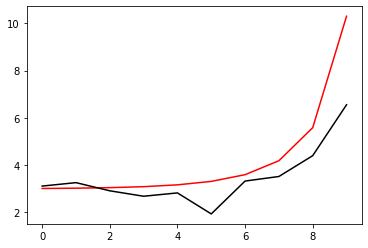

1809 4.033026058935599 -0.9947155394310828
[3.09352756 3.23833018 2.9011378  2.67810265 2.82344366 1.96069279
 3.36815652 3.59192436 4.47754933 6.60119479]


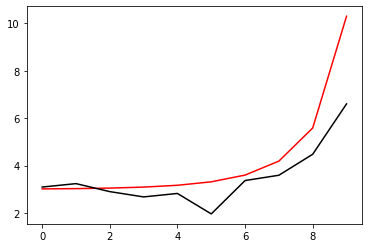

2010 1.760217709177525 -0.9959144561657916
[3.07846244 3.22320824 2.89414    2.67808448 2.82833064 1.99157767
 3.41689152 3.66830013 4.55674947 6.64992924]


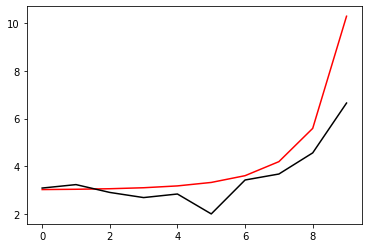

2211 5.237479634732291 -0.9972328478243775
[3.07604707 3.22062557 2.89957634 2.69071777 2.84659275 2.03606619
 3.47957774 3.755103   4.64427397 6.70381563]


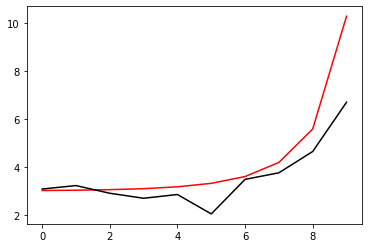

2412 7.4120320310267545 -0.9967583449637143
[3.08538689 3.22976713 2.91681093 2.71498766 2.87595651 2.08917861
 3.54576187 3.83802715 4.72567732 6.75393636]


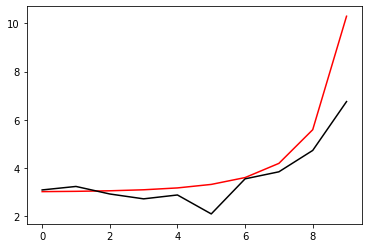

2613 3.048956406237901 -0.9967686461606893
[3.08743238 3.23051718 2.92476965 2.72867087 2.89265003 2.1272787
 3.59249416 3.90127701 4.79130562 6.79440898]


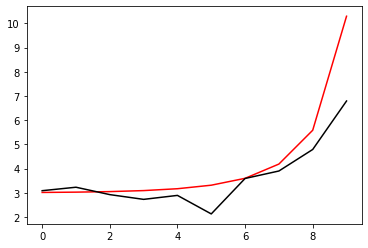

2814 1.1091072732156981 -0.9968447566981983
[3.08243386 3.2233071  2.92433876 2.73326181 2.89899065 2.15495812
 3.62705587 3.95355702 4.84840564 6.82959048]


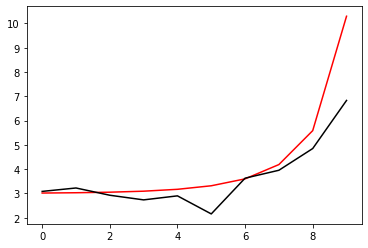

3015 2.95363404373737 -0.9969156389770931
[3.07546889 3.2137057  2.92165145 2.73548915 2.90237996 2.18025652
 3.65807383 4.00231395 4.90225015 6.86274003]


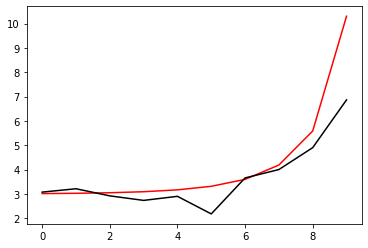

3216 2.0330802771148746 -0.9968548817562207
[3.06635757 3.20177936 2.91702769 2.73596052 2.90375554 2.20453495
 3.68740427 4.04962686 4.95474759 6.89506504]


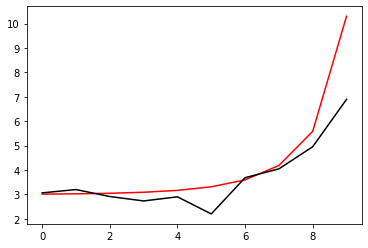

3417 1.175452682778725 -0.9962417946378267
[3.04314446 3.17711088 2.90127186 2.72724088 2.89816987 2.22601698
 3.71842627 4.10350583 5.01644315 6.93295619]


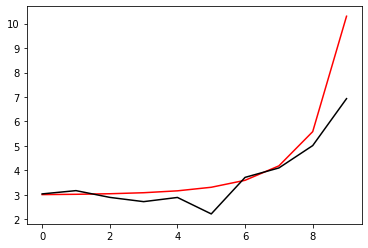

3618 0.1902776608245173 -0.996631694704305
[3.02947332 3.16272399 2.89549885 2.72879148 2.90399018 2.25861843
 3.76252664 4.16983703 5.08865142 6.97742225]


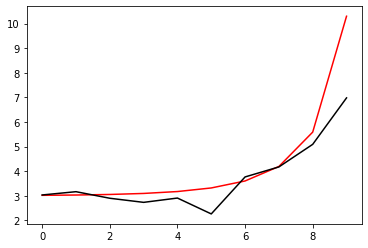

3819 3.9980282107998213 -0.996834526397763
[3.02081558 3.15264477 2.89274454 2.73203377 2.91006592 2.28905914
 3.80203219 4.23047652 5.15482719 7.018181  ]


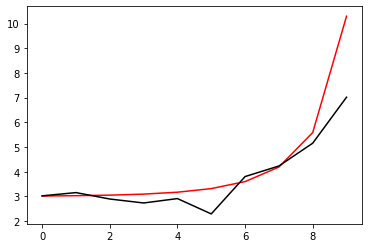

4020 1.2455099062591004 -0.9970844441750003
[3.01346373 3.14324384 2.88988135 2.73428711 2.91406323 2.3162305
 3.83652903 4.28594255 5.21612509 7.05590874]


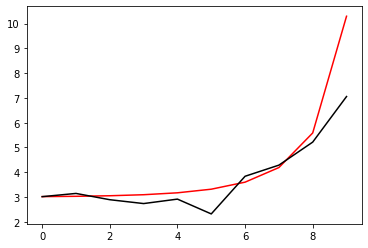

4221 5.065974450362871 -0.9974474616657665
[3.00657862 3.13375821 2.88642507 2.7353596  2.91610598 2.34098421
 3.86751377 4.33822131 5.27465699 7.0919295 ]


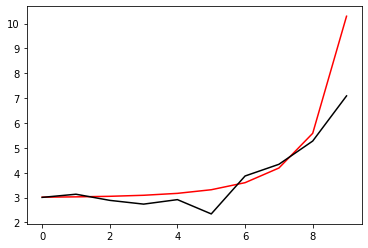

4422 7.030691159146566 -0.9979570146599863
[2.99913359 3.12321854 2.8815564  2.73466551 2.91599814 2.36377005
 3.89652524 4.38987639 5.3335136  7.12813813]


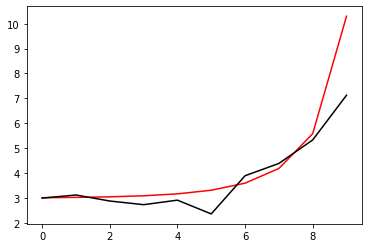

4623 1.8621191144952487 -0.9987766612191474
[2.98885978 3.10941265 2.87311431 2.73035573 2.91270196 2.38452775
 3.92621609 4.44633316 5.39984048 7.16891919]


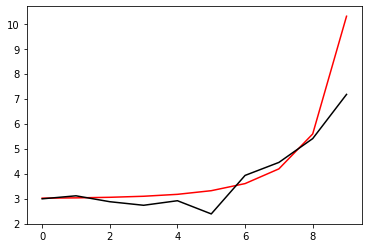

4824 1.0292376045774465 -1.0025892669446563
[2.96317038 3.08021656 2.84911641 2.71119484 2.89684125 2.39585532
 3.95590013 4.51601125 5.48848742 7.22343754]


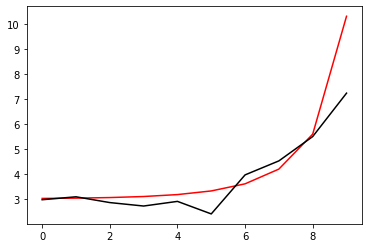

5025 1.2706229557061093 -1.0038793297906579
[2.93896523 3.0548684  2.83025562 2.69834166 2.88839047 2.41342012
 3.99102966 4.58609935 5.57084108 7.27407812]


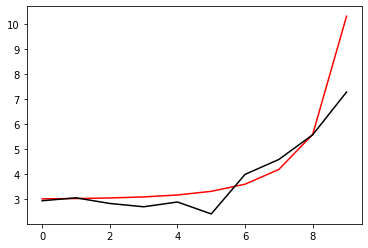

5226 2.0449441699634976 -1.004150380611488
[2.9314536  3.04616434 2.82808729 2.70200216 2.89591749 2.44519013
 4.03516374 4.65316281 5.64197123 7.31788636]


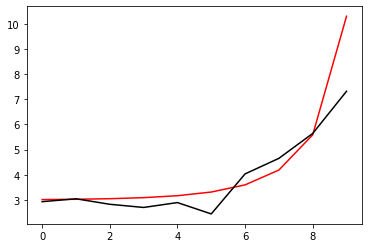

5427 2.0208554759579105 -1.0042793887989734
[2.92511748 3.03836679 2.82668742 2.70617334 2.90342587 2.47614036
 4.07553257 4.7123338  5.70389226 7.35605128]


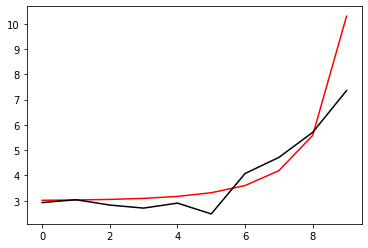

5628 1.0151959445384795 -1.00434386533937
[2.91975898 3.03115927 2.82564677 2.71034809 2.91028351 2.50583644
 4.11215434 4.76504139 5.75844942 7.38969074]


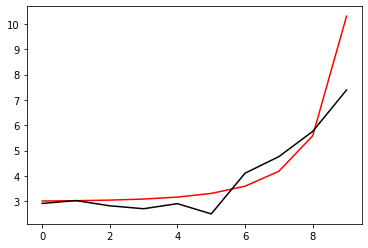

5829 2.960504310851627 -1.0044062378794811
[2.91533583 3.02446419 2.82486126 2.71441098 2.91637137 2.5344468
 4.14567068 4.81284186 5.80741237 7.41987834]


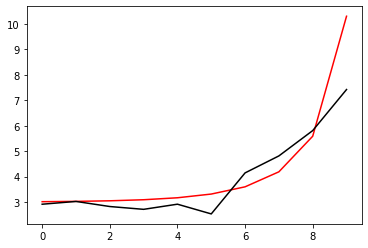

6030 1.1228930938640613 -1.004395772407081
[2.91185215 3.01831511 2.82437476 2.71844323 2.92183668 2.56239306
 4.17690796 4.85712672 5.85226573 7.44750941]


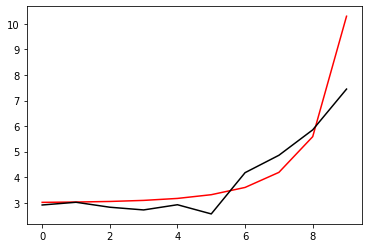

6231 5.027048883829722 -1.0043820058617277
[2.90915353 3.01262505 2.82411927 2.72243169 2.92677104 2.59000354
 4.20659491 4.89905007 5.89423315 7.47336241]


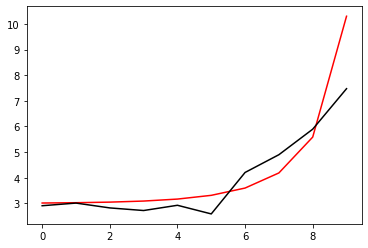

6432 5.719064703285998 -1.0043830153597295
[2.90701195 3.00729446 2.82405614 2.72644822 2.93144879 2.61779919
 4.23578526 4.9399734  5.93466846 7.49819313]


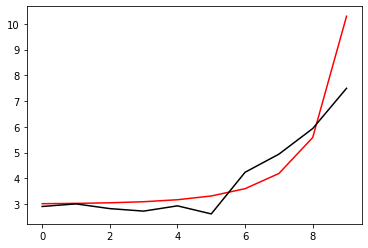

6633 0.07423803153581922 -1.0043088315111413
[2.90544285 3.00253717 2.82451142 2.73097823 2.93663411 2.6466646
 4.26591343 4.98137855 5.97488733 7.52290108]


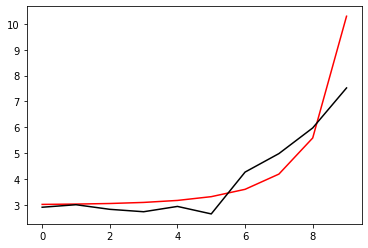

6834 1.03404467916965 -1.0041599517888269
[2.90483737 2.99907369 2.826446   2.7373024  2.9441607  2.67854014
 4.29991986 5.02602918 6.01722969 7.54893773]


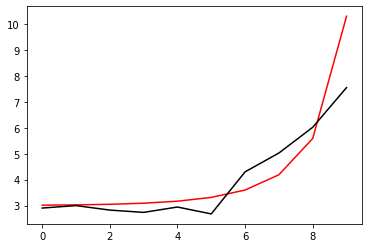

7035 1.1776718793493182 -1.003396431098628
[2.91030881 3.00254496 2.83591539 2.75206356 2.96177876 2.72082232
 4.34681054 5.08173927 6.0679737  7.58018052]


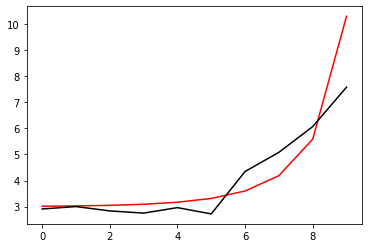

7236 2.0269348226469917 -1.0029906660581298
[2.91275812 3.00203015 2.84021887 2.76068857 2.97280994 2.75504782
 4.38854745 5.13927641 6.12496729 7.615295  ]


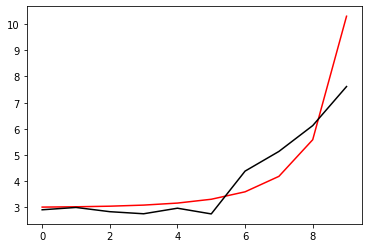

7437 1.5191759727203467 -1.0029616876837026
[2.9097439  2.99540488 2.83779291 2.76188128 2.97549117 2.77996739
 4.42036965 5.19047073 6.17887433 7.64845383]


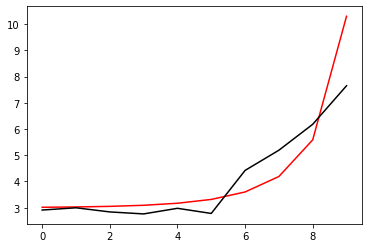

7638 0.11075907353882009 -1.0029691536347736
[2.90717001 2.98891746 2.83530815 2.76276516 2.97744024 2.803593
 4.4496607  5.23927661 6.23091806 7.68044992]


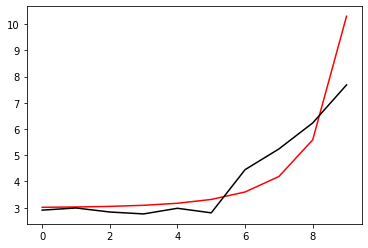

7839 3.0232702445658344 -1.003050366524345
[2.90468493 2.98235157 2.83265232 2.76337366 2.97889841 2.82654412
 4.47750266 5.28683444 6.28203458 7.71189257]


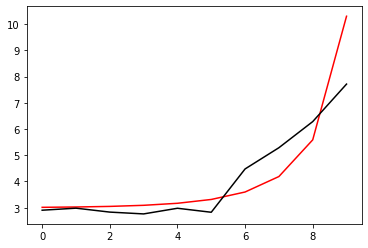

8040 1.0266049434283042 -1.0031733201647666
[2.90212579 2.97570772 2.82986441 2.7638323  2.98016364 2.84926525
 4.50477261 5.33411651 6.33301911 7.74327637]


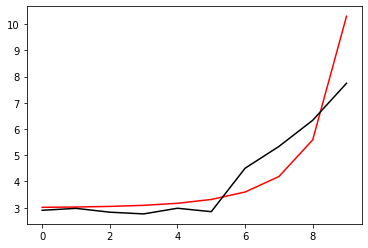

8241 5.002751658874957 -1.003305221529602
[2.89968969 2.96929739 2.82720129 2.76438485 2.98155274 2.87199199
 4.53199611 5.38168858 6.38425519 7.77482982]


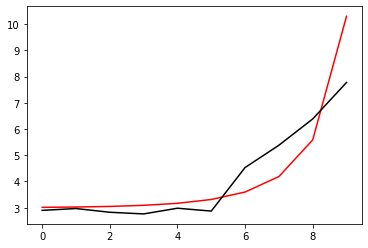

8442 5.556301614343767 -1.003490266754935
[2.89759684 2.96334789 2.82478498 2.7650679  2.98306838 2.89456406
 4.55912675 5.42956368 6.43567977 7.80646133]


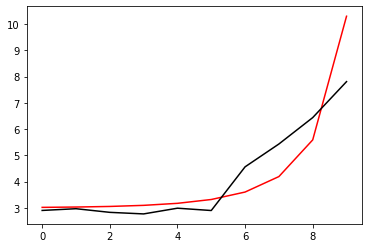

8643 0.050651961919876906 -1.0036203256806726
[2.89604867 2.95802763 2.82273186 2.76594009 2.98471647 2.91688621
 4.58602072 5.47755144 6.4870539  7.83807438]


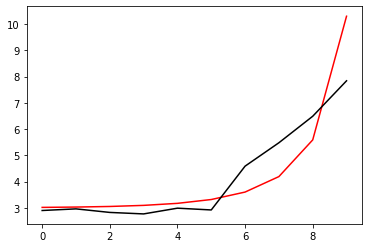

8844 1.029628115830127 -1.0037186115284487
[2.89490832 2.95320234 2.82094511 2.76693519 2.98646211 2.93898882
 4.61276333 5.52574723 6.53848039 7.86973894]


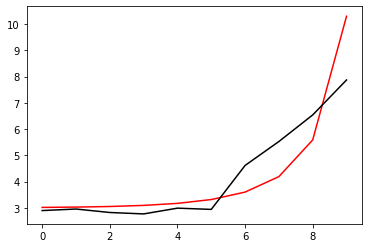

9045 1.069275256099035 -1.003841662350816
[2.8940347  2.94876308 2.81939442 2.76809766 2.98842986 2.96112156
 4.63971274 5.57448534 6.59027398 7.90162807]


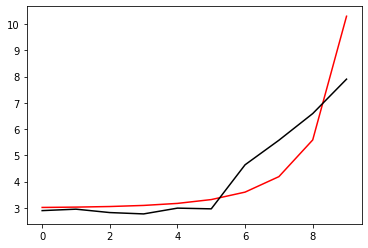

9246 2.0290053526226086 -1.0039474426476023
[2.89319186 2.94454425 2.81802506 2.76947824 2.99077953 2.98358691
 4.66730011 5.62415724 6.64279396 7.93397385]


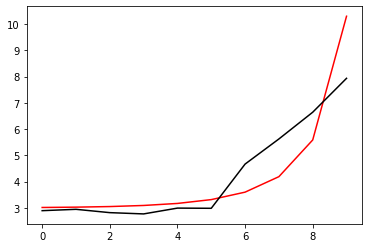

9447 1.3625832273971148 -1.0039092962951712
[2.89224778 2.94049539 2.81690848 2.7712733  2.9938498  3.00690405
 4.69625646 5.67544665 6.69663987 7.96707663]


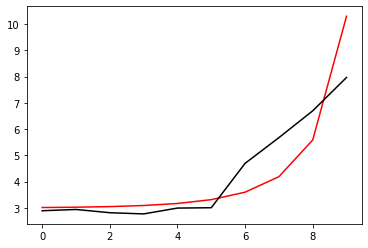

9648 0.03258180568735969 -1.0038807415878201
[2.89099787 2.93651362 2.81607831 2.77365527 2.99796713 3.03157249
 4.7272913  5.72901276 6.75238645 8.00136771]


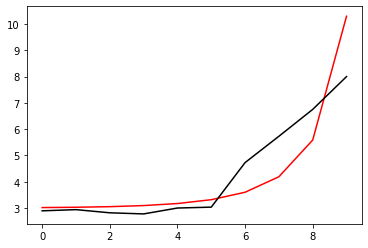

9849 2.9047425119065697 -1.0038668625512057
[2.88928185 2.93259119 2.81571452 2.77700577 3.00375443 3.05846516
 4.76165734 5.78606492 6.81109946 8.03748082]


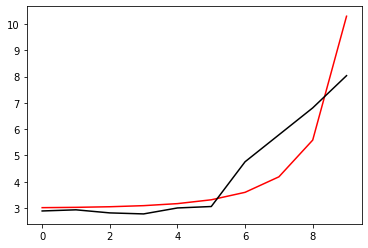

In [90]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 4.9160344136153515 -1.0038308625070769
[2.88473899 2.92617522 2.81711796 2.78667842 3.01995196 3.11169284
 4.83012756 5.89768316 6.92891842 8.10958421]


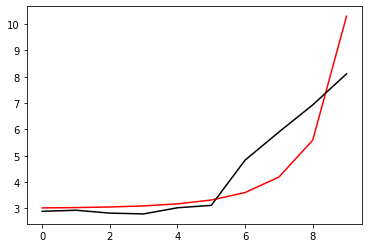

402 5.326264979262619 -1.0039399585666688
[2.88070109 2.92269606 2.81941883 2.79500623 3.0335608  3.14554692
 4.87357683 5.96489691 7.00326901 8.15540045]


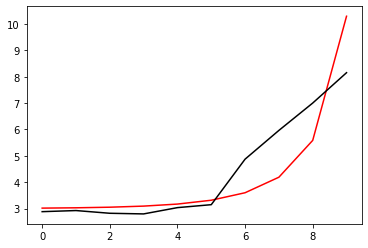

603 0.05063371878592671 -1.0040754820314532
[2.87527863 2.91889855 2.82207033 2.8043156  3.04890737 3.1801857
 4.91806434 6.03212438 7.0790893  8.20211486]


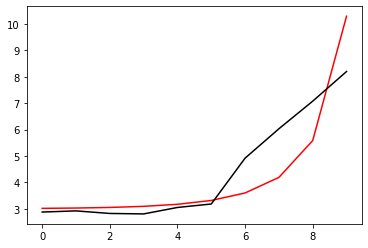

804 1.027501165323183 -1.0042331756287202
[2.86849694 2.91423641 2.82405793 2.81312548 3.06396102 3.21360145
 4.96100637 6.09671391 7.1531095  8.24774538]


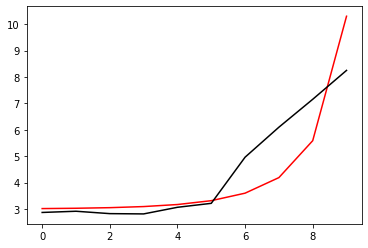

1005 0.6552393202516628 -1.0044007726130832
[2.86115064 2.90900979 2.82537732 2.82115108 3.07809917 3.2454469
 5.00167419 6.15784958 7.22362678 8.29116827]


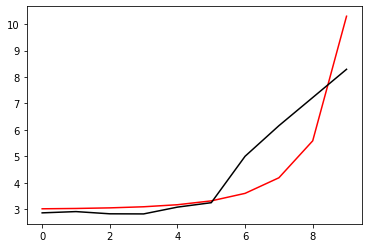

1206 2.0287804328181296 -1.004551259715194
[2.85386463 2.90359321 2.82630557 2.82858339 3.09137952 3.2760457
 5.04016443 6.2156079  7.29021844 8.33218237]


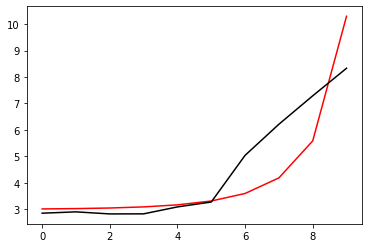

1407 1.0926612715990744 -1.0046193627794842
[2.84691943 2.8981646  2.82702112 2.83560728 3.10396155 3.30577312
 5.07675066 6.27033624 7.35308166 8.37089325]


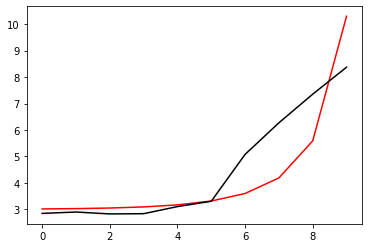

1608 0.029303018954801602 -1.0046831532628986
[2.84039844 2.89276729 2.82759147 2.8423154  3.11593576 3.33485613
 5.11158097 6.32227247 7.41245987 8.40747268]


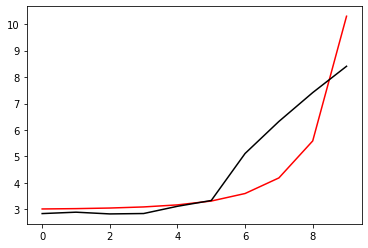

1809 2.0856133990214003 -1.0047368725341987
[2.83435765 2.88744716 2.82809131 2.84881237 3.12741669 3.36349917
 5.1448121  6.37167505 7.46867333 8.44209401]


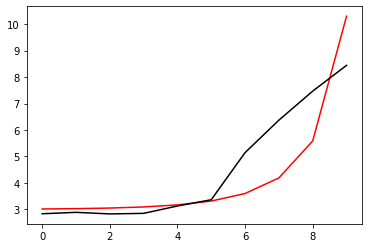

2010 1.0302563667346767 -1.0047968792422828
[2.82875123 2.88215397 2.82848553 2.8550795  3.13838619 3.39173586
 5.17644025 6.41866084 7.52193289 8.47491921]


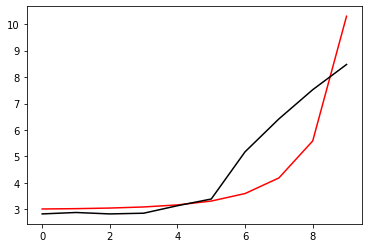

2211 4.5128644821522315 -1.004881319530227
[2.8235477  2.87686674 2.82877211 2.86114177 3.14889333 3.41967909
 5.20659809 6.46349877 7.5725975  8.50609413]


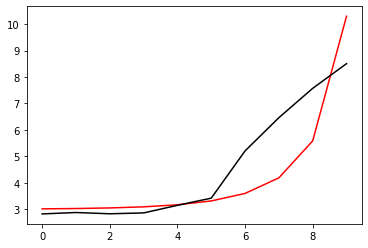

2412 5.080309281719069 -1.0050093423709974
[2.81870621 2.87155992 2.82893331 2.8669926  3.15893425 3.44734545
 5.2352785  6.50627549 7.62081835 8.5357604 ]


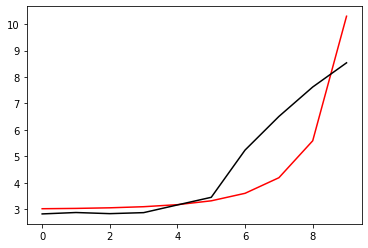

2613 0.03921098567018101 -1.005109429246767
[2.81425945 2.8662882  2.82902853 2.87270191 3.1685869  3.47482744
 5.26255973 6.54714524 7.66679648 8.56405512]


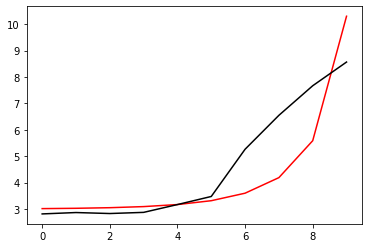

2814 1.0242677286258568 -1.00521361544848
[2.81021422 2.86108632 2.82909586 2.87832065 3.17791973 3.50221336
 5.28853413 6.58627968 7.71075255 8.59111373]


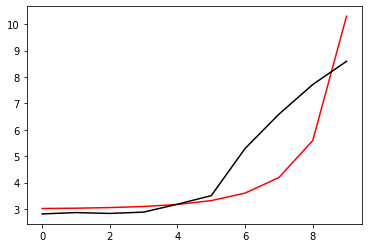

3015 0.15484165944771075 -1.005339427484229
[2.8065751  2.85599942 2.82918994 2.88392587 3.18704474 3.52964313
 5.31336434 6.62391237 7.75296248 8.61707507]


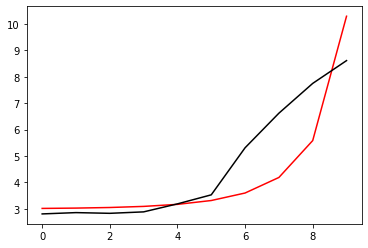

3216 2.0348667654857997 -1.0054622051378725
[2.8032555  2.85099325 2.8292868  2.88951327 3.19598945 3.5571608
 5.3371079  6.66017044 7.79360058 8.64209104]


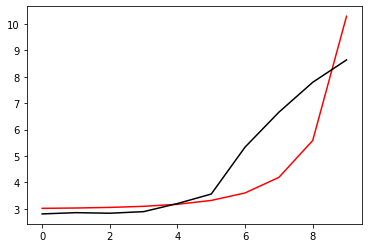

3417 1.062129542298461 -1.0055131679676197
[2.80021756 2.84609791 2.82943842 2.89516995 3.20489945 3.58493833
 5.35997607 6.69531649 7.83296251 8.66632977]


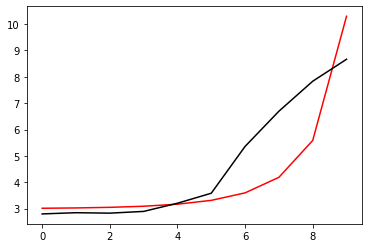

3618 0.03505552221887222 -1.0055717746454584
[2.79739886 2.8413396  2.82970564 2.90100412 3.21396127 3.61318697
 5.38223271 6.72964905 7.87137156 8.68999737]


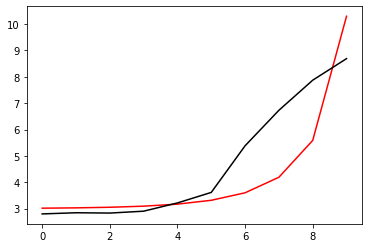

3819 2.019767003808371 -1.005674103983269
[2.79471826 2.83676543 2.8302003  2.90720861 3.22349849 3.64227362
 5.404352   6.76365445 7.90932543 8.71338925]


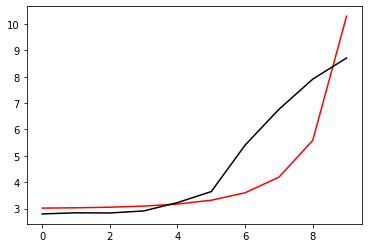

4020 1.0371979448958037 -1.0058178264400175
[2.79214401 2.83257523 2.83126357 2.91428586 3.23425604 3.6730019
 5.42734237 6.79826929 7.94772376 8.73705714]


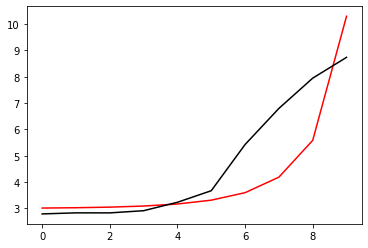

4221 4.125594058854123 -1.0060607031886752
[2.78897811 2.82859337 2.83306927 2.92281428 3.24742667 3.70687142
 5.45345931 6.83568404 7.98870403 8.76224273]


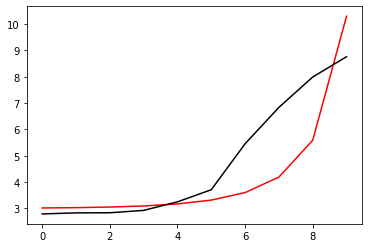

4422 5.047167723454839 -1.0063289927316283
[2.78365418 2.82403932 2.83519777 2.93281039 3.26387376 3.74512724
 5.48580613 6.87918041 8.03556498 8.79106794]


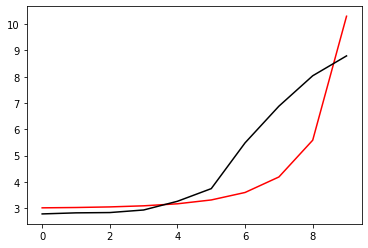

4623 0.08834691477785385 -1.0064159454231416
[2.7762733  2.8189663  2.83713427 2.94317103 3.2822853  3.78577125
 5.52509986 6.93061853 8.0905997  8.82494425]


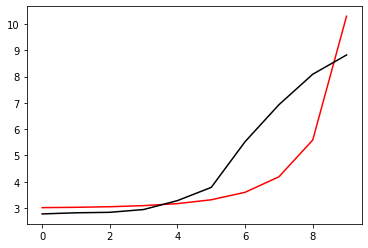

4824 0.5096380501744526 -1.0066790835247081
[2.76950899 2.8147918  2.83907565 2.95257065 3.29937129 3.82299544
 5.56479409 6.98447409 8.14908653 8.86085868]


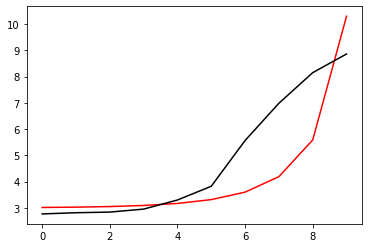

5025 0.07924600486571248 -1.0067889025493038
[2.76396232 2.8114498  2.84073355 2.96035032 3.31356745 3.8543605
 5.59948228 7.0344189  8.20478112 8.89507327]


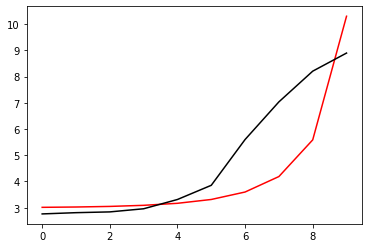

5226 2.0591095955972682 -1.006823227493779
[2.75937766 2.80867259 2.84215695 2.96692311 3.32552429 3.88124229
 5.62933349 7.07961167 8.25638791 8.92681333]


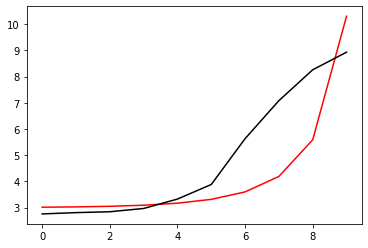

5427 1.0721095816122688 -1.0068075903552742
[2.75545854 2.80625214 2.84340031 2.97266702 3.33594535 3.90509862
 5.65562012 7.12101017 8.30455376 8.95646651]


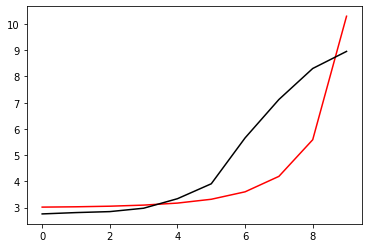

5628 0.05383608595189973 -1.0067756219083777
[2.75200742 2.80405915 2.84449657 2.97781866 3.345289   3.92689265
 5.67934828 7.15959733 8.35010598 8.98454514]


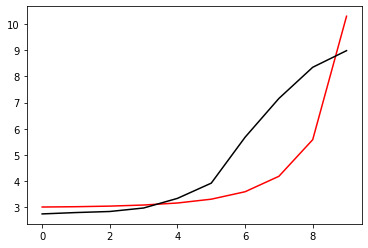

5829 2.047694117458832 -1.00673154121025
[2.74889499 2.80200931 2.84546248 2.98252413 3.35384914 3.94725398
 5.70123375 7.19615614 8.39375435 9.01147309]


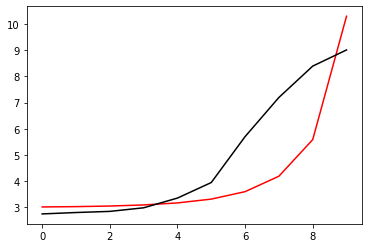

6030 1.0636508654254964 -1.006667498627097
[2.74605217 2.80006534 2.8463286  2.98690122 3.3618455  3.96663068
 5.72179889 7.23127769 8.43604197 9.03757425]


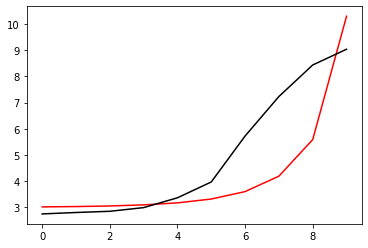

6231 3.8707971545429776 -1.0066029157396195
[2.74338979 2.79815636 2.84706943 2.99098861 3.36940168 3.98533681
 5.74146777 7.26549588 8.47749498 9.06309388]


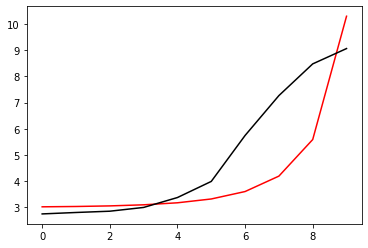

6432 4.970973431923746 -1.006588904304467
[2.74089492 2.79628897 2.84772879 2.99487757 3.37666507 4.00363762
 5.76054161 7.29913244 8.51838658 9.08823226]


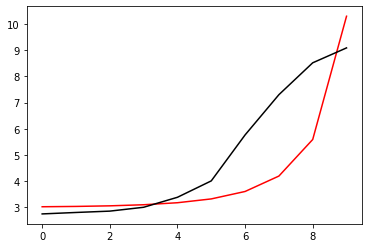

6633 0.09112931173831315 -1.0065218858809293
[2.73842467 2.79433551 2.84820928 2.99851231 3.3836355  4.02164881
 5.77920683 7.33243446 8.55895319 9.11315563]


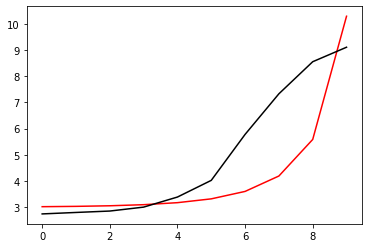

6834 0.16971799670237214 -1.006557861139651
[2.73613847 2.79246755 2.84870686 3.00212368 3.39059225 4.0397366
 5.79786484 7.36575988 8.59946393 9.13800486]


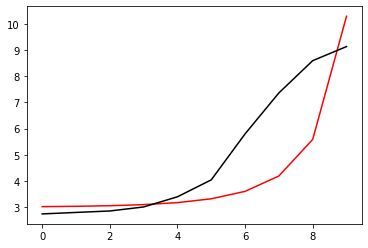

7035 0.07909360193449633 -1.0065692755587392
[2.7339302  2.79058907 2.84914638 3.00566748 3.39753618 4.057985
 5.81664616 7.39923394 8.6400106  9.16290905]


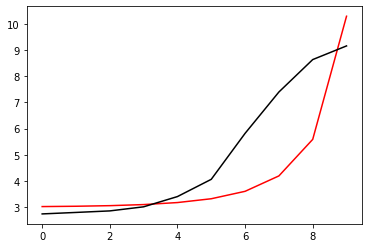

7236 2.0585490206960064 -1.0065592352331987
[2.73177538 2.78869634 2.84955584 3.00921589 3.40460238 4.07662366
 5.83583919 7.4330934  8.6807659  9.18798332]


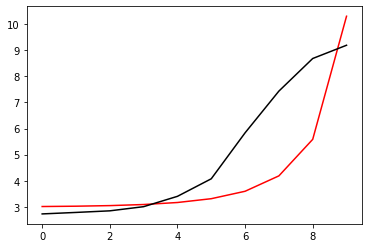

7437 1.0577029764482617 -1.0065275991127192
[2.72963094 2.78677547 2.84996259 3.01285298 3.41195558 4.0959251
 5.85578743 7.46759916 8.72192241 9.213343  ]


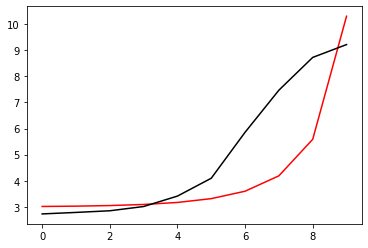

7638 0.05413611198261166 -1.0064785229536997
[2.72743953 2.78481642 2.85041854 3.01671262 3.4198425  4.11626581
 5.8769485  7.50307551 8.76372588 9.23913062]


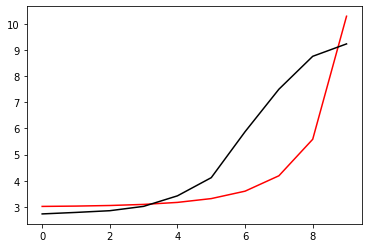

7839 2.053900315065405 -1.0064095378873306
[2.72511464 2.78281528 2.85102269 3.02102552 3.42866769 4.13821965
 5.89999562 7.53999741 8.80656149 9.265569  ]


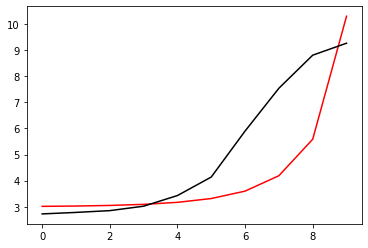

8040 1.0632279599515988 -1.0063107689444584
[2.72252587 2.78080164 2.85199706 3.0262509  3.43918667 4.16277327
 5.92604324 7.57918784 8.85114143 9.29308342]


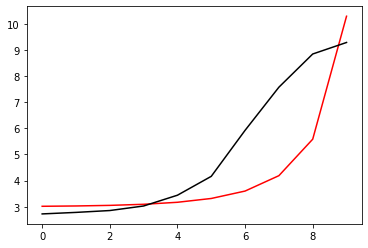

8241 3.6171960572562285 -1.0061868050955467
[2.7194576  2.77892003 2.85390884 3.03346115 3.45306696 4.191955
 5.95739898 7.62258201 8.89925704 9.32264847]


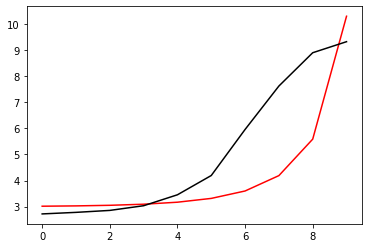

8442 4.906650267937688 -1.0060839932216536
[2.71589795 2.77812262 2.85875653 3.04577366 3.4745179  4.23018328
 5.99907966 7.67488509 8.95549311 9.3571318 ]


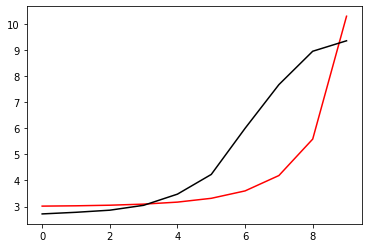

8643 0.11245609409010623 -1.0056980981583816
[2.71040827 2.77803896 2.86693104 3.06399504 3.50438867 4.27758511
 6.05446592 7.74311295 9.02950114 9.40255897]


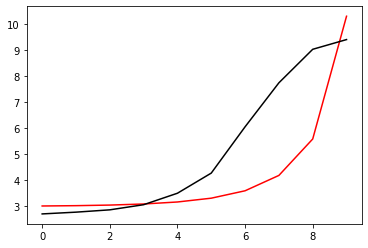

8844 0.07336723582703548 -1.0057681622562644
[2.70151037 2.77412826 2.87022664 3.07583227 3.52616627 4.3144817
 6.10170718 7.8066743  9.10300729 9.44777032]


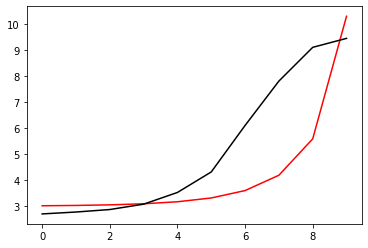

9045 0.1705984584563583 -1.0059448296322175
[2.69344212 2.77025526 2.8724292  3.08519938 3.54388715 4.34511866
 6.14156133 7.86188743 9.16836462 9.48799297]


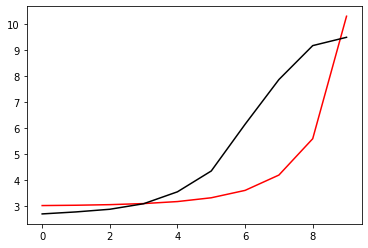

9246 2.0549318741220723 -1.0060630655045386
[2.68644943 2.76698491 2.87464526 3.09392477 3.56025615 4.37341705
 6.17836428 7.91308535 9.22916033 9.52544239]


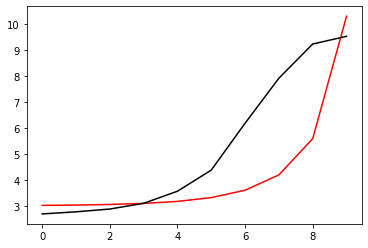

9447 0.904238765411594 -1.0060181405881345
[2.6808731  2.76480523 2.87760622 3.10309795 3.57688631 4.40182961
 6.21544683 7.96437965 9.28969565 9.56271856]


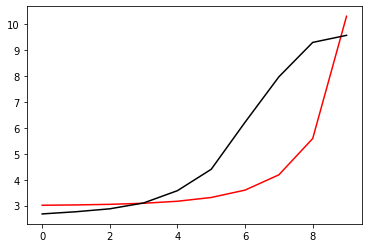

9648 0.05062273334184165 -1.0051192558962034
[2.6803894  2.76744127 2.88517084 3.11694653 3.59883832 4.43695787
 6.26224028 8.02777852 9.36318759 9.60790603]


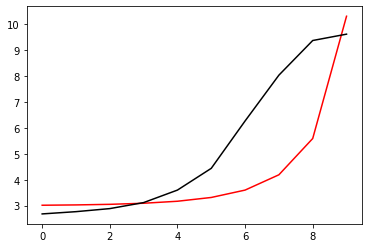

9849 1.8975355728471754 -1.0053150303570724
[2.67535813 2.76479998 2.88683635 3.12474466 3.61557155 4.46929231
 6.31285427 8.10289108 9.4534072  9.66347233]


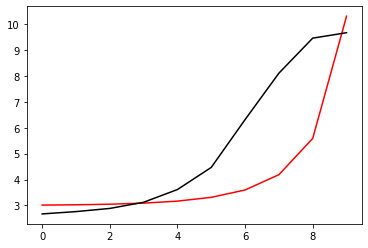

In [91]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.4362653353718984 -1.005502996584448
[2.66699008 2.75974155 2.88722117 3.13272172 3.6347074  4.50864986
 6.37949415 8.20807354 9.58222524 9.74254497]


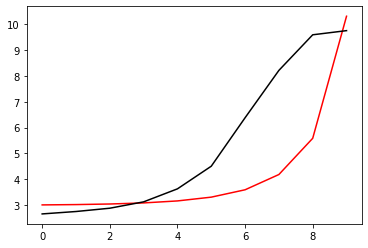

402 3.9671903215214965 -1.0056223454891906
[2.6629451  2.75738318 2.88751932 3.13665715 3.64395662 4.52759851
 6.4112333  8.2591036  9.64534724 9.78144864]


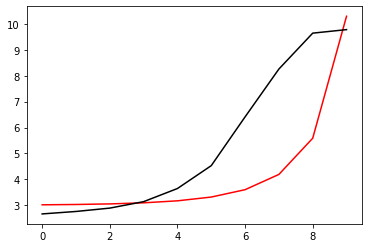

603 0.1508732570951444 -1.0056488956430494
[2.65903023 2.75502881 2.88770358 3.14034544 3.65277779 4.54582211
 6.44165339 8.3080348  9.70596195 9.8187707 ]


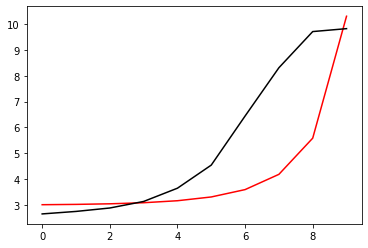

804 0.06621433255063297 -1.0056634799114161
[2.65537486 2.75272823 2.88775594 3.14370538 3.66102284 4.56310229
 6.47046414 8.35460963 9.76385543 9.85442334]


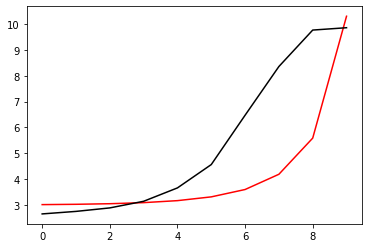

1005 0.39870279116175306 -1.0057439446950973
[2.65188492 2.75035761 2.8875292  3.14656899 3.66850304 4.57923768
 6.49746881 8.39872708 9.81900951 9.88838268]


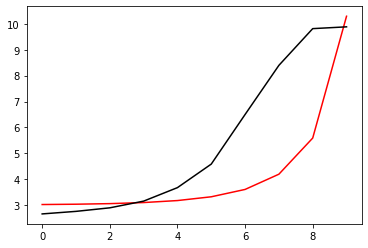

1206 2.067590653832564 -1.005800281266145
[2.64864264 2.74800109 2.8871087  3.14901931 3.67529304 4.59429096
 6.52271061 8.44044498 9.87147937 9.92070674]


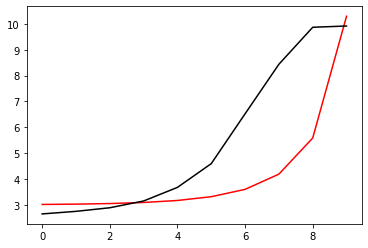

1407 0.12389697171493659 -1.005809295969541
[2.64563107 2.74566094 2.88651426 3.15109219 3.68144422 4.60833622
 6.54629669 8.47993748 9.92147454 9.95151425]


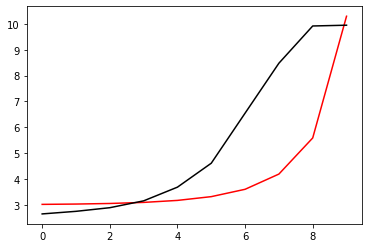

1608 0.08109930726654693 -1.0057887368357776
[2.64279701 2.74331278 2.88574703 3.15281252 3.68700588 4.62145581
 6.56835345 8.5174     9.9692299  9.98095822]


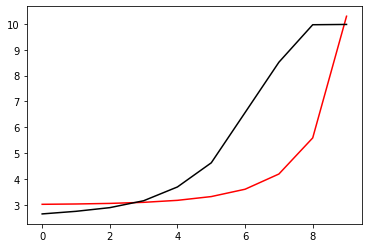

1809 1.4415361264640456 -1.005704099910782
[ 2.64016806  2.74102244  2.88490728  3.1543139   3.6921474   4.63386525
  6.58915124  8.55315976 10.01508907 10.00919619]


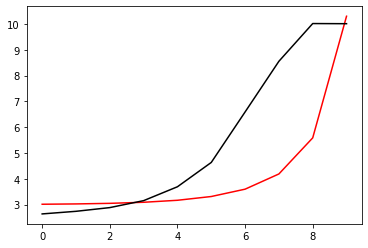

2010 1.0932469710304809 -1.005585787082644
[ 2.63766796  2.73874073  2.88396928  3.1555925   3.69688755  4.64561246
  6.60876962  8.58734039 10.05920845 10.03637559]


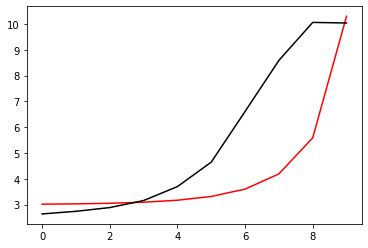

2211 2.211543328267645 -1.0054686741966838
[ 2.63526883  2.73646551  2.88295509  3.15669549  3.70130287  4.65681473
  6.62737328  8.62015807 10.10183317 10.06261948]


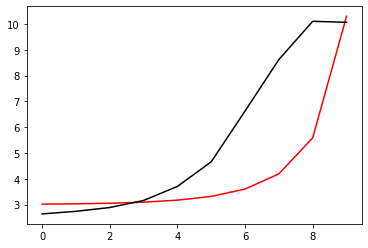

2412 3.4410229281984233 -1.005498053863445
[ 2.63302273  2.73426719  2.88195322  3.15773111  3.70552557  4.66763787
  6.64516238  8.65184052 10.14319873 10.08803162]


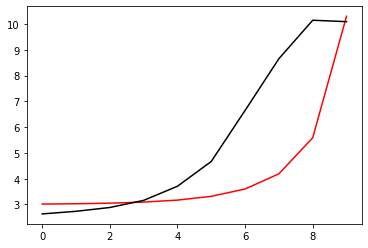

2613 0.1003156846632412 -1.0055063316152808
[ 2.6308486   2.73207932  2.88091138  3.15866138  3.70953278  4.67807805
  6.66214428  8.68240982 10.18334481 10.1127091 ]


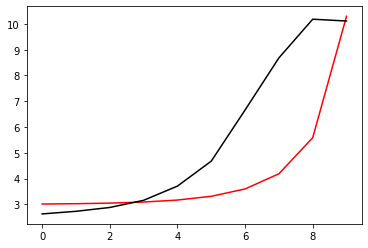

2814 0.07944137533265773 -1.0055006476664083
[ 2.6287482   2.72991304  2.87985179  3.15952223  3.71337846  4.68821607
  6.67842477  8.7119939  10.22241068 10.13674057]


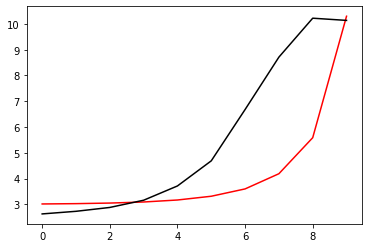

3015 0.2551116932085721 -1.0055214389840597
[ 2.62661065  2.72766542  2.87868323  3.1602393   3.71701346  4.69804519
  6.69405291  8.74071177 10.26056586 10.16021196]


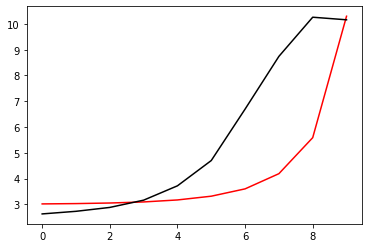

3216 2.077332702593261 -1.0055210051669905
[ 2.62452663  2.72543367  2.87751163  3.16092958  3.72056874  4.70771502
  6.70918475  8.76870412 10.2979235  10.18321398]


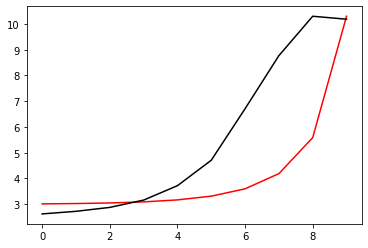

3417 0.09782992303260118 -1.0054879327250335
[ 2.6224792   2.72320668  2.87633628  3.16160807  3.72408271  4.7173014
  6.72393764  8.79612251 10.33464534 10.20584269]


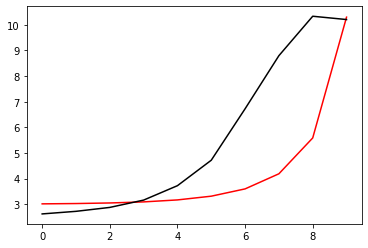

3618 0.08639276097989704 -1.0054315779718404
[ 2.62044223  2.72096144  2.87514365  3.16227769  3.72758447  4.72687672
  6.73843431  8.82312958 10.3709037  10.22820214]


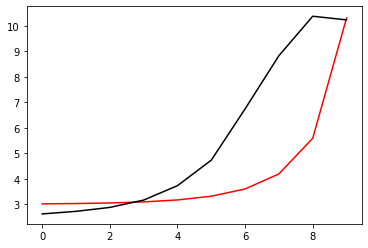

3819 1.2256974411432533 -1.0053361091349575
[ 2.61845537  2.71873699  2.87398183  3.16300583  3.73117453  4.73659659
  6.75289471  8.8499832  10.40694834 10.25040218]


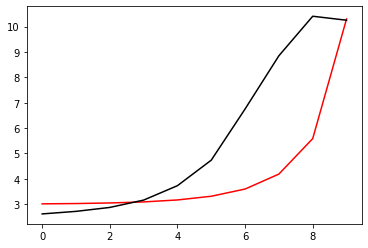

4020 1.0962509291333848 -1.0052167437524686
[ 2.61649952  2.71648903  2.87279651  3.16374223  3.73482285  4.74647514
  6.76738465  8.87678342 10.44288186 10.27254743]


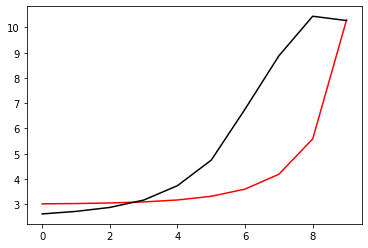

4221 2.133631325525838 -1.0051026140173722
[ 2.61468024  2.71426051  2.8715943   3.16448036  3.73853404  4.75655972
  6.78200092  8.90364807 10.47880566 10.29467739]


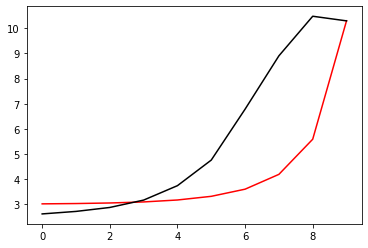

4422 3.3227342734063328 -1.0051128411184014
[ 2.61322238  2.71215824  2.87040346  3.16520317  3.74227654  4.76683962
  6.79675159  8.93057841 10.51469282 10.31669747]


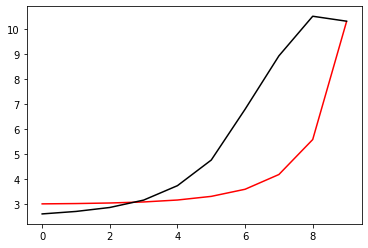

4623 0.08998195940026421 -1.0050964725769542
[ 2.61228516  2.71018106  2.8691061   3.16570949  3.74578843  4.77701003
  6.81125489  8.95712524 10.55006423 10.33841246]


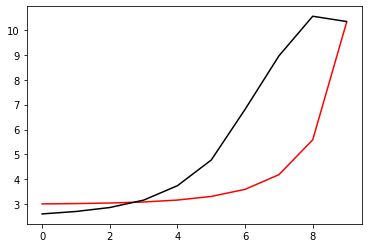

4824 0.08342965081064532 -1.0050574666863314
[ 2.61199079  2.70830232  2.86756861  3.16579526  3.74882271  4.78680903
  6.82521387  8.98298037 10.58461347 10.35964188]


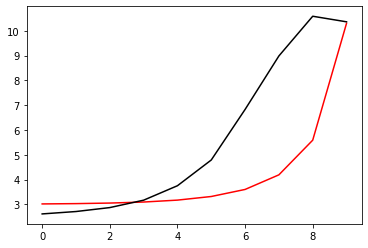

5025 0.20654304600231926 -1.0050763033463974
[ 2.61239904  2.70644759  2.86561909  3.16523174  3.7511285   4.79600448
  6.83841329  9.00797631 10.61820725 10.38029461]


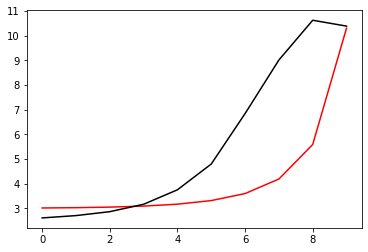

5226 2.0815182093334887 -1.0050949279572372
[ 2.61359907  2.70462894  2.86320357  3.16393114  3.75261311  4.80452995
  6.85079465  9.03206931 10.6508055  10.40036132]


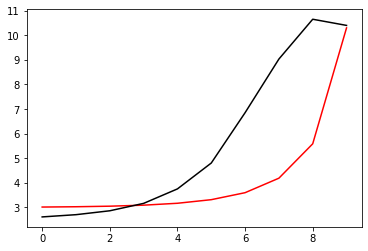

5427 0.09158470274353962 -1.005101076757835
[ 2.61560286  2.70282129  2.86024208  3.16178914  3.75318407  4.81234694
  6.86236701  9.05531432 10.68248373 10.41988607]


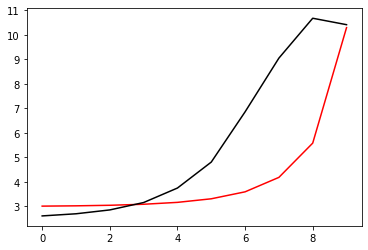

5628 0.08982026591572691 -1.0050945077941758
[ 2.61837539  2.70101831  2.85669207  3.15874648  3.75280468  4.81948738
  6.87322178  9.0778389  10.71338017 10.4389482 ]


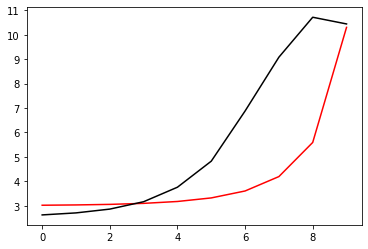

5829 1.1403945758373375 -1.0050607088374752
[ 2.62187793  2.69929206  2.85261623  3.15485516  3.75155709  4.82611102
  6.88357375  9.09985976 10.74369802 10.45764785]


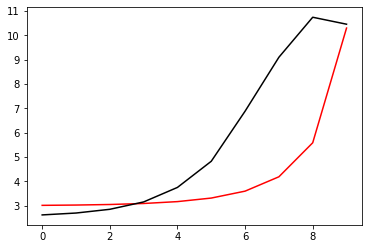

6030 1.103022321386623 -1.0049925279486742
[ 2.62593306  2.69764303  2.84803244  3.15011769  3.74946734  4.8323229
  6.89358555  9.12153884 10.77359117 10.47609317]


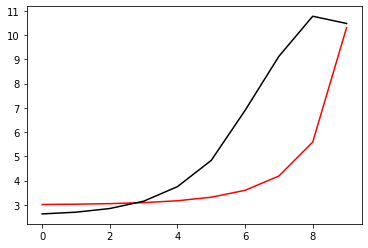

6231 2.1152704602201586 -1.0049219755498524
[ 2.63036809  2.69611556  2.8430393   3.1446175   3.74663658  4.83830702
  6.90349516  9.14308798 10.80324825 10.49438038]


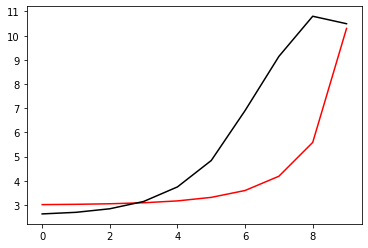

6432 3.1296879588480513 -1.005169986900366
[ 2.63658858  2.69625664  2.83914931  3.13968093  3.74416135  4.84488889
  6.91376576  9.16464666 10.83266071 10.51251895]


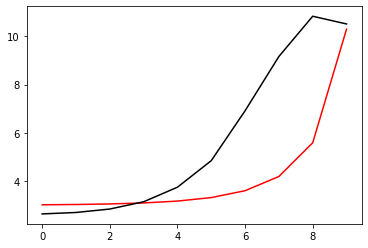

6633 0.10056625309266616 -1.0050424083719318
[ 2.64253488  2.69553189  2.8327446   3.1298151   3.73409626  4.84207744
  6.915278    9.17927376 10.85633338 10.5269767 ]


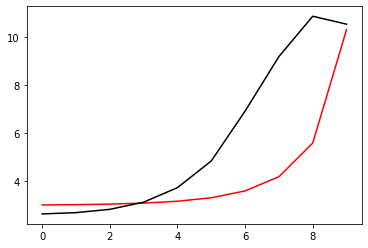

6834 0.09089450400351713 -1.0049518843488847
[ 2.64614434  2.69474778  2.82839672  3.12390927  3.72981893  4.8465782
  6.92423467  9.19983364 10.88473618 10.54440266]


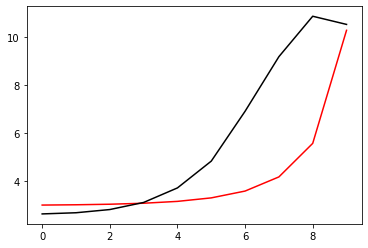

7035 0.18196191339316609 -1.0049039370022805
[ 2.6496277   2.6941254   2.82430466  3.11814389  3.72546859  4.85093821
  6.93329724  9.22040503 10.9130144  10.56176198]


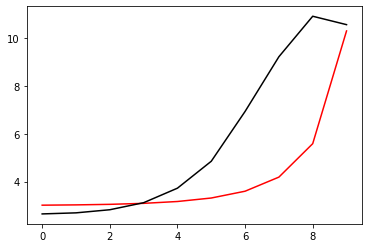

7236 2.084708145084523 -1.004846809241306
[ 2.65297745  2.69360748  2.8204146   3.11250189  3.72103548  4.85504844
  6.94233115  9.24085151 10.94104517 10.57899283]


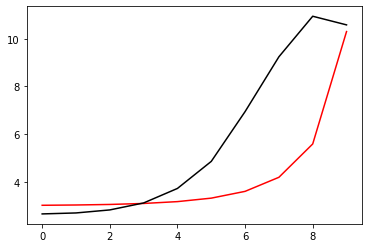

7437 0.08989650898490116 -1.0047758611016528
[ 2.65620408  2.69316713  2.81669832  3.10698442  3.71653931  4.85885009
  6.9512416   9.26107715 10.96874589 10.59604595]


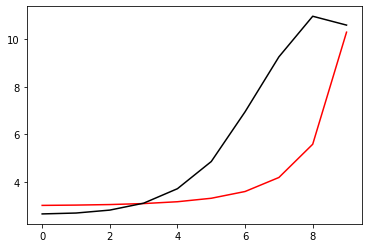

7638 0.08851162109123249 -1.0046970538041304
[ 2.6593166   2.6927861   2.81313457  3.10159251  3.71200182  4.86230018
  6.95992591  9.28097581 10.99602564 10.61286169]


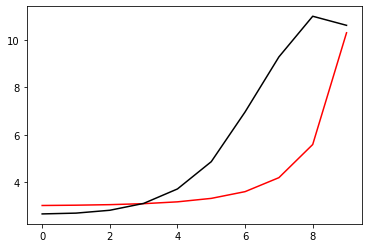

7839 1.115829978906926 -1.0046085384733592
[ 2.66234174  2.69247448  2.80973388  3.09635825  3.70748191  4.8654128
  6.96830483  9.30044743 11.02279497 10.62936826]


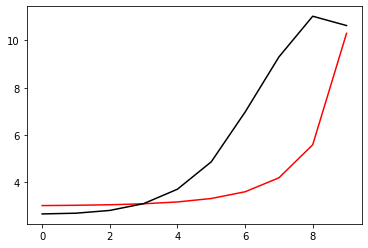

8040 1.0929391639323474 -1.0045106008650828
[ 2.66527292  2.69220472  2.806457    3.09124401  3.70294604  4.86810582
  6.97620394  9.31932799 11.04892104 10.64548774]


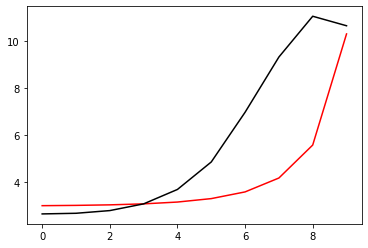

8241 2.1065838466662132 -1.0044192487768244
[ 2.6681253   2.69197673  2.80329497  3.08624355  3.69839703  4.8703548
  6.98349395  9.33748717 11.07430133 10.66114321]


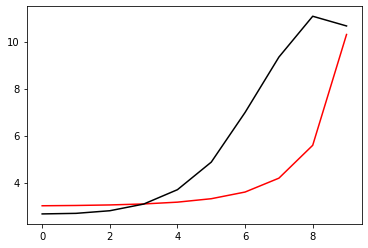

8442 2.9208941826200734 -1.0043537908847229
[ 2.67085531  2.69173243  2.80018302  3.08130344  3.69382154  4.87221491
  6.99022202  9.35499097 11.09902977 10.67627493]


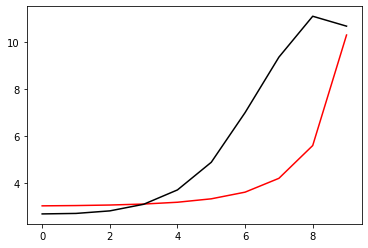

8643 0.09117370516727732 -1.004323028080666
[ 2.67356145  2.69155457  2.79718529  3.07646692  3.68922622  4.87359551
  6.9961156   9.37155694 11.12286089 10.69087874]


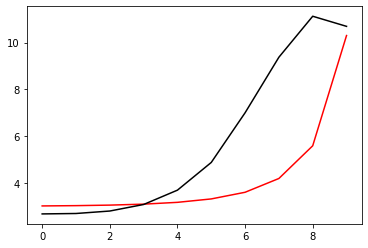

8844 0.09247615894152159 -1.0043270756809186
[ 2.67626746  2.69144912  2.79429204  3.07171811  3.68460542  4.87452054
  7.00117172  9.38720145 11.14584244 10.70499197]


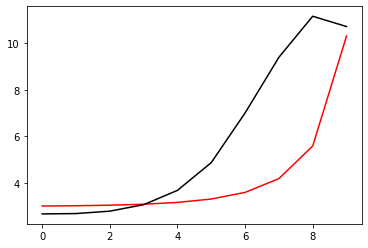

9045 0.18604955104369658 -1.0045101475553595
[ 2.67916228  2.69158717  2.79166     3.0672127   3.68013894  4.87521638
  7.00556105  9.40205493 11.1681056  10.71869012]


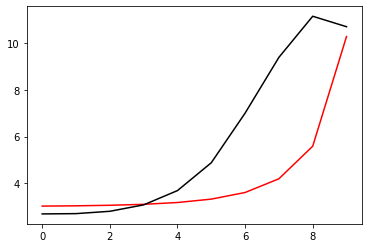

9246 2.0877970990076022 -1.004673812231781
[ 2.68204268  2.69175347  2.7890641   3.06272451  3.67561993  4.8755578
  7.00929738  9.41622654 11.18980567 10.73206845]


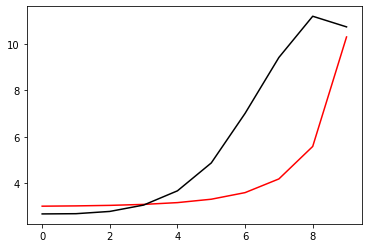

9447 0.09692036340333926 -1.0048089656646622
[ 2.68491187  2.69194297  2.78649441  3.0582491   3.67107143  4.87563497
  7.01252459  9.42987056 11.21110522 10.74521981]


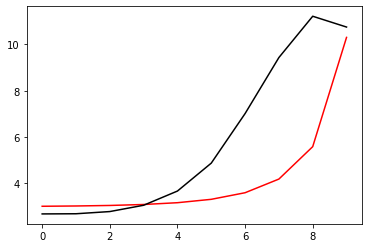

9648 0.09975516105274705 -1.0049143417433766
[ 2.68776612  2.69214787  2.7839424   3.05378591  3.66651914  4.87553087
  7.01537656  9.44312582 11.23214615 10.75822292]


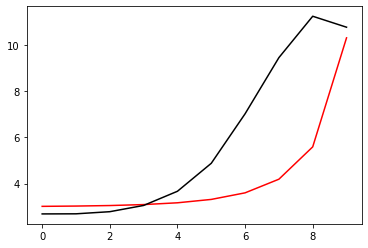

9849 1.1319704356919509 -1.0049797820997242
[ 2.69061297  2.69237916  2.78142692  3.04937047  3.66203223  4.87536908
  7.01800786  9.45613041 11.25305783 10.77113954]


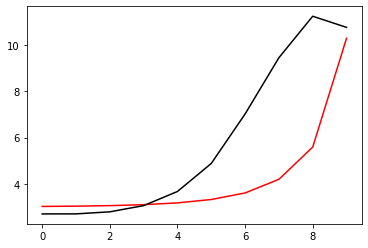

In [92]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.1054045096549143 -1.0041942570555333
[ 2.69306229  2.69172856  2.77767004  3.04282964  3.65633941  4.87796417
  7.02883969  9.48490885 11.29350191 10.79601507]


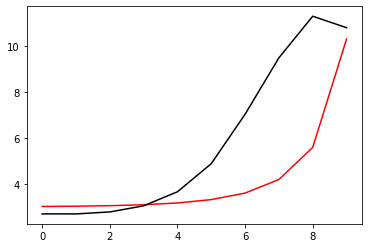

402 2.8385326246832294 -1.0041592455305972
[ 2.6953112   2.69202919  2.77597027  3.0398457   3.65338054  4.87780912
  7.03095562  9.49639334 11.31220578 10.80743364]


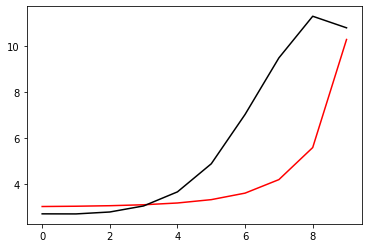

603 0.09274982736603488 -1.0042236478994007
[ 2.69764301  2.69211538  2.77370436  3.03601827  3.64947556  4.8769745
  7.03254972  9.50815549 11.33196477 10.81956069]


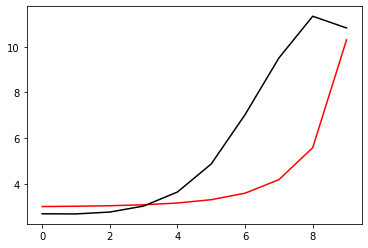

804 0.09446405695338979 -1.0042863931569022
[ 2.7000918   2.69221664  2.77131954  3.03199127  3.64542157  4.87624188
  7.03431492  9.52027547 11.35239734 10.83212292]


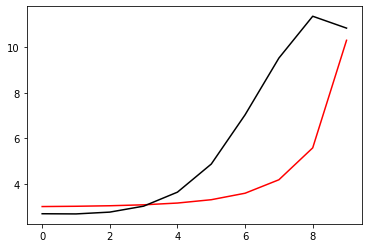

1005 0.15975173183422112 -1.0044436250893822
[ 2.70273387  2.69247866  2.76903855  3.02804631  3.64151475  4.87577867
  7.03629357  9.53259417 11.37319482 10.8449184 ]


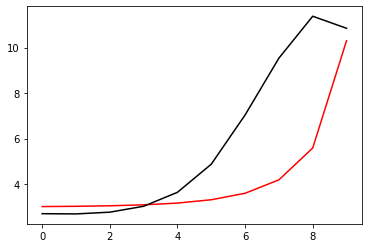

1206 2.0899487041639455 -1.0045802870237428
[ 2.70535727  2.69273018  2.76673495  3.02408865  3.63766167  4.87543257
  7.03838308  9.54500187 11.39420725 10.85786201]


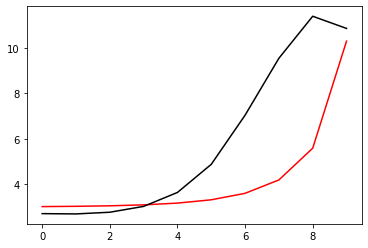

1407 0.09789348588117808 -1.0046923509945613
[ 2.70793548  2.69296574  2.76442807  3.02015537  3.63389866  4.87519586
  7.04056985  9.55745058 11.41535072 10.87090355]


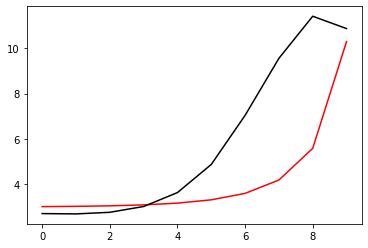

1608 0.09994200987096293 -1.004781345522813
[ 2.71045305  2.6931816   2.76212854  3.01626636  3.63024107  4.87505274
  7.04283835  9.56990726 11.43657051 10.88400616]


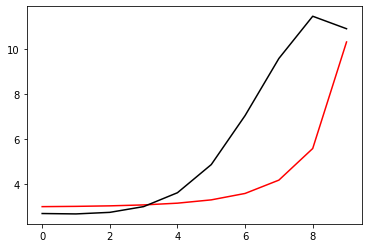

1809 1.1262033859369218 -1.0048412437875818
[ 2.71291651  2.69339475  2.75986687  3.01246314  3.62673332  4.87503324
  7.04520923  9.58236748 11.45784056 10.89713881]


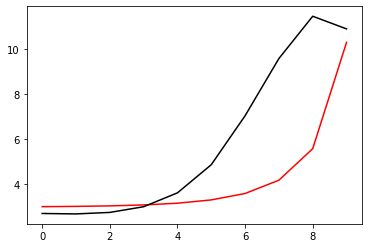

2010 1.1243751913803897 -1.0048611377079264
[ 2.7153117   2.6935918   2.75763092  3.00872977  3.62334374  4.87507737
  7.04762888  9.59478399 11.47910984 10.91027546]


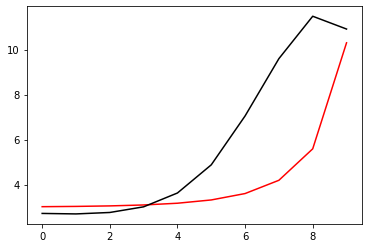

2211 2.111970757290248 -1.0048629430631653
[ 2.7176322   2.69376769  2.75541835  3.00506434  3.62006509  4.87517006
  7.05009023  9.6071488  11.50036344 10.92339249]


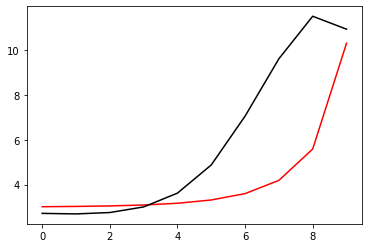

2412 2.749584377303515 -1.004704253707116
[ 2.71974081  2.6937822   2.75309006  3.00133368  3.61678417  4.87527443
  7.05268545  9.61960295 11.52174812 10.93647041]


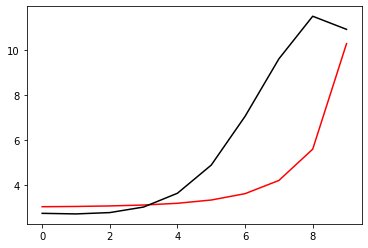

2613 0.09951125168705141 -1.0045469911572174
[ 2.72178096  2.69378388  2.75079694  2.9976811   3.61361001  4.875398
  7.05528061  9.63195667 11.5430585  10.94951314]


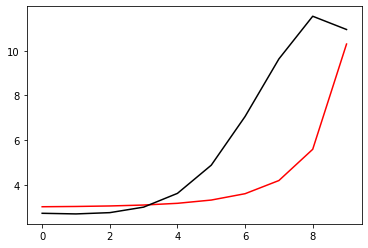

2814 0.09695869459737542 -1.0044022714633263
[ 2.72375751  2.69377739  2.74854397  2.99411039  3.61054159  4.87553477
  7.05786614  9.64419804 11.56427926 10.96252272]


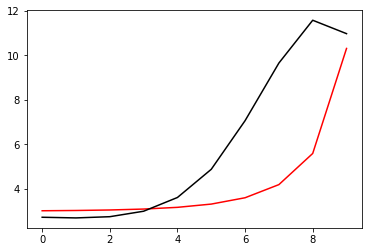

3015 0.15020345545943498 -1.0043000802001258
[ 2.72572254  2.69381082  2.74637593  2.99066241  3.60761388  4.87571227
  7.06045052  9.6563227  11.58539958 10.97549699]


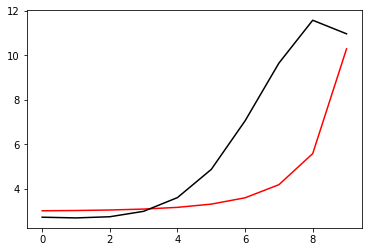

3216 2.0917749682268707 -1.0042074825451865
[ 2.727627    2.6938384   2.74425044  2.98729631  3.60478385  4.8758886
  7.06300241  9.66830963 11.60640144 10.98842896]


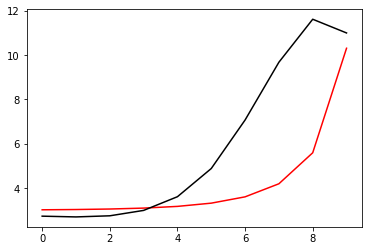

3417 0.09382919669382776 -1.004121926934059
[ 2.72947261  2.69386064  2.74216688  2.98400927  3.60204429  4.8760539
  7.06550805  9.68014583 11.62727203 11.00130665]


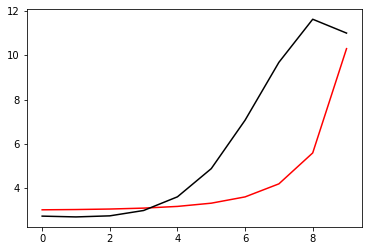

3618 0.09460246966033119 -1.004044371733105
[ 2.73125966  2.69387585  2.74012163  2.9807948   3.59938394  4.87619481
  7.06795194  9.69181862 11.64800028 11.01411458]


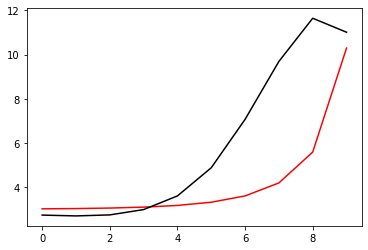

3819 1.1105022155645021 -1.0039758890737882
[ 2.73301319  2.69391032  2.73814297  2.97768369  3.5968367   4.8763493
  7.07035534  9.70333509 11.66858756 11.026836  ]


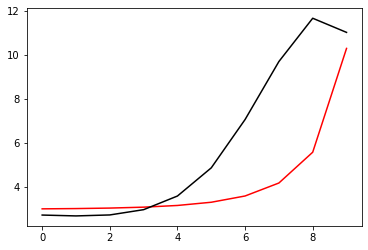

4020 1.0967715893863554 -1.003912453787672
[ 2.7347121   2.6939384   2.73619994  2.97463779  3.59435402  4.87646278
  7.07267361  9.7146681  11.68901578 11.0394564 ]


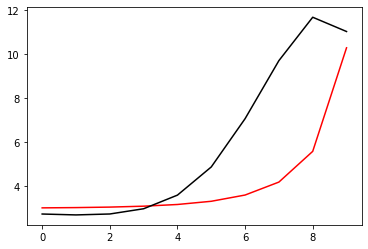

4221 2.107295125581171 -1.0038649462826614
[ 2.73637719  2.69397874  2.73430926  2.97167183  3.59194858  4.87654803
  7.07490991  9.72581619 11.70928285 11.05196403]


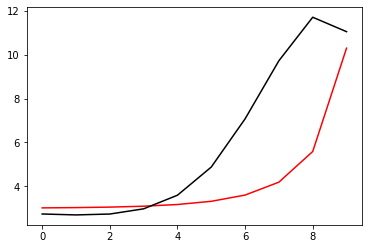

4422 2.742254460814514 -1.0039736048454708
[ 2.73804335  2.69407428  2.73252605  2.96886134  3.58973419  4.87678503
  7.07725857  9.73694102 11.72953019 11.06435156]


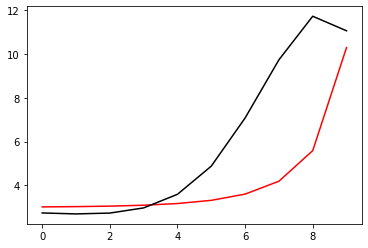

4623 0.09707082430539317 -1.0040736507753363
[ 2.73965882  2.69416214  2.73077168  2.96610192  3.58755934  4.87695158
  7.07948299  9.7478509  11.74959485 11.0766329 ]


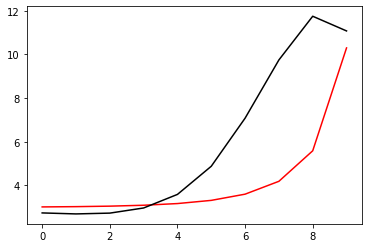

4824 0.0995725893609208 -1.0041677183531068
[ 2.74122925  2.69424658  2.72904905  2.96339504  3.58542412  4.87704974
  7.08158194  9.75854432 11.76947672 11.08882016]


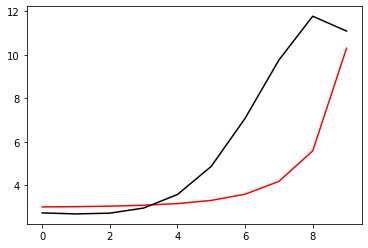

5025 0.13811882081602156 -1.0043055911926004
[ 2.74289861  2.69446847  2.72749731  2.96087999  3.58346939  4.87721131
  7.08362589  9.76904245 11.7891784  11.10092148]


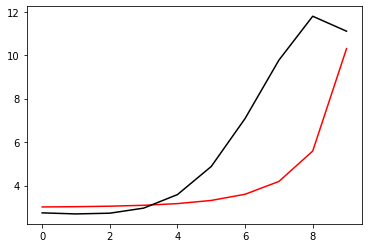

5226 2.0951343128826654 -1.004427341822308
[ 2.74451257  2.69467534  2.72596472  2.95840382  3.58153991  4.87729821
  7.08554164  9.77932587 11.80870304 11.11294011]


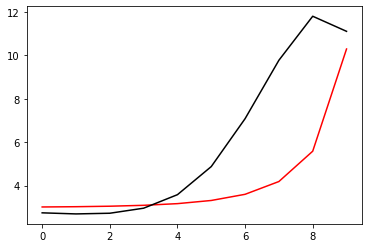

5427 0.10266887576874499 -1.004529571268969
[ 2.74607478  2.69486987  2.72445314  2.95596749  3.57963592  4.87731319
  7.0873297   9.7893946  11.82805172 11.12487452]


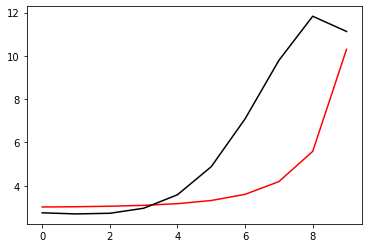

5628 0.10456588921911888 -1.0046131552051603
[ 2.74758725  2.6950527   2.72296191  2.95356905  3.57775438  4.87725587
  7.08898947  9.79924894 11.84722631 11.13671915]


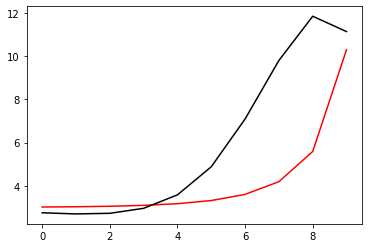

5829 1.1232647547347603 -1.004673267889084
[ 2.74906466  2.69523994  2.72150927  2.95122961  3.57592078  4.87715845
  7.09054591  9.80890436 11.86623837 11.14846601]


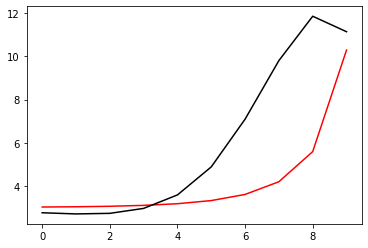

6030 1.1274806037813179 -1.0046989258564065
[ 2.75050239  2.69542368  2.72008344  2.9489324   3.57411156  4.87699295
  7.09197274  9.8183421  11.8850743  11.16010763]


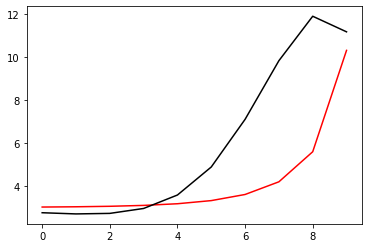

6231 2.111809997491204 -1.0047068881407684
[ 2.75189704  2.69559863  2.71867757  2.94666933  3.57231885  4.87675822
  7.0932758   9.82757178 11.90374556 11.17163682]


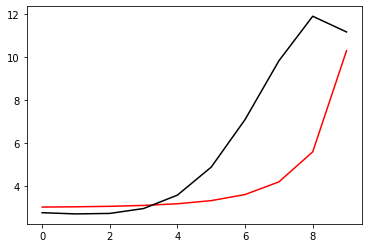

6432 2.5405605793024977 -1.0045687589312464
[ 2.7531038   2.69561889  2.71714857  2.94430813  3.57044181  4.8764393
  7.09455818  9.83675238 11.92242585 11.18304929]


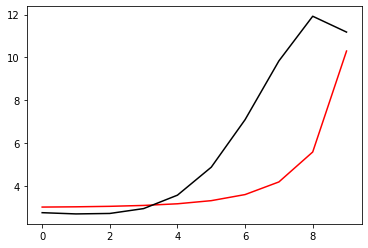

6633 0.1050556959247884 -1.004432688173048
[ 2.75428237  2.69564441  2.71565286  2.941993    3.56859043  4.87605733
  7.09570924  9.8457118  11.94092805 11.19436381]


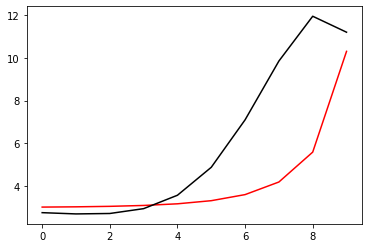

6834 0.10283000393814122 -1.0043075214600354
[ 2.75543531  2.69567679  2.71419129  2.93972424  3.56676536  4.87561751
  7.09673651  9.85445752 11.95925952 11.20559526]


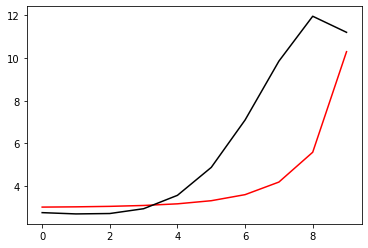

7035 0.13827897020506874 -1.0042112572498205
[ 2.75662     2.69577028  2.71281571  2.93755183  3.56501521  4.87516563
  7.09766862  9.86300245 11.97742625 11.21675314]


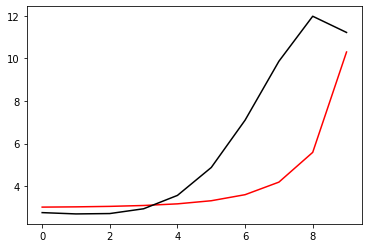

7236 2.0968557141610336 -1.0041241543166097
[ 2.7577757   2.6958665   2.71146997  2.9354215   3.56328834  4.87466161
  7.09848845  9.87134604 11.99543405 11.22784114]


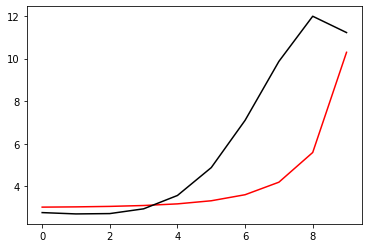

7437 0.0993744885045243 -1.0040436018201306
[ 2.75890195  2.69596433  2.71015258  2.93333132  3.5615828   4.87410667
  7.09919918  9.87949186 12.01328619 11.23885765]


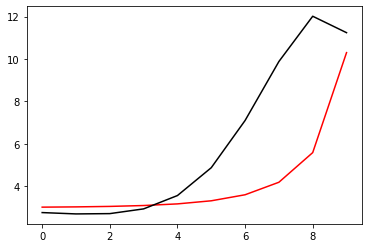

7638 0.10007427371229687 -1.0039703899012395
[ 2.75999657  2.69606047  2.70885931  2.93127613  3.55989304  4.87349848
  7.09980196  9.88744295 12.03098597 11.24979702]


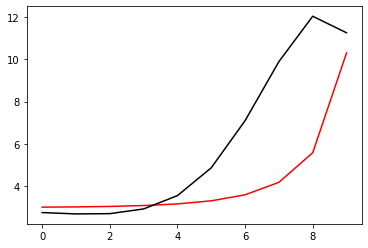

7839 1.1111164522539732 -1.0039050928223334
[ 2.76108     2.69617658  2.70761374  2.92928197  3.55824834  4.87286997
  7.10032321  9.89521614 12.04854449 11.26065136]


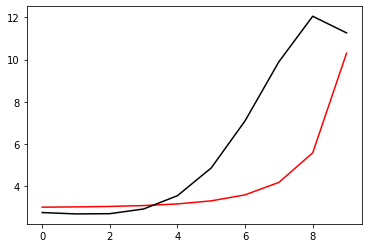

8040 1.1022063700058056 -1.003844096774973
[ 2.76213205  2.69628993  2.7063904   2.92731995  3.55661635  4.87219048
  7.10074256  9.90280155 12.06595633 11.27141336]


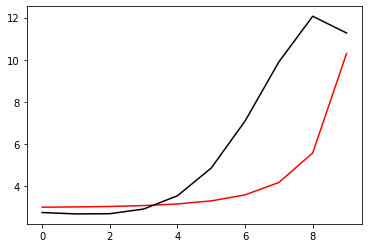

8241 2.1077236411240885 -1.0037971217334778
[ 2.76317014  2.69641603  2.70520331  2.92540277  3.55500904  4.87147307
  7.10107087  9.91020686 12.08322666 11.28207692]


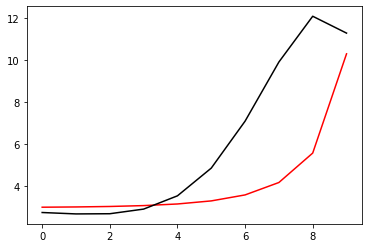

8442 2.637363612331286 -1.0039270875888322
[ 2.76427942  2.69665236  2.70416649  2.92366828  3.55360088  4.87093728
  7.10152981  9.91761921 12.10051653 11.29263871]


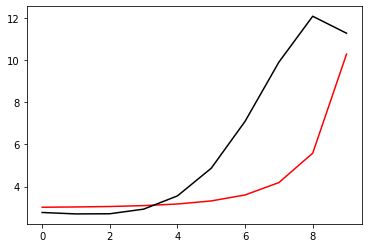

8643 0.10208040565721371 -1.0040452882431186
[ 2.76535064  2.69687666  2.70314046  2.92195138  3.55218724  4.87033461
  7.10187672  9.92483953 12.11765526 11.30311681]


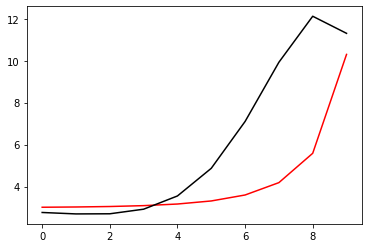

8844 0.10449687049482896 -1.004154222818643
[ 2.76638733  2.69709172  2.70212761  2.92025404  3.55077023  4.86966962
  7.10211695  9.9318725  12.13464587 11.3135259 ]


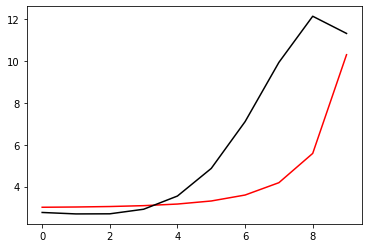

9045 0.13035024350515373 -1.0042825673329778
[ 2.76750451  2.69740899  2.70123653  2.91868217  3.54945134  4.8690296
  7.10230184  9.93873758 12.15149152 11.32387513]


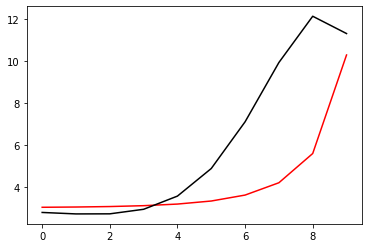

9246 2.0998760374201644 -1.004395994651488
[ 2.76858041  2.69771091  2.70035383  2.91712642  3.54812822  4.86833393
  7.1023924   9.94542846 12.16819892 11.33416726]


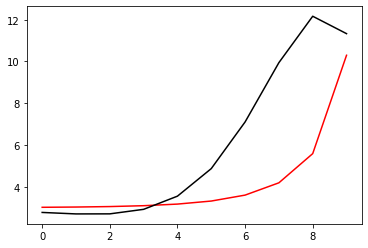

9447 0.10880446027183548 -1.0044901251028324
[ 2.76961767  2.69799986  2.69948185  2.91558908  3.54680332  4.86758664
  7.10239251  9.95194799 12.18476888 11.34439952]


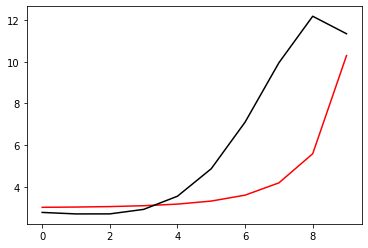

9648 0.11058634535192066 -1.0045655293905849
[ 2.77061723  2.69827604  2.69862034  2.91406945  3.54547602  4.86678918
  7.10230507  9.95829949 12.20120324 11.35456478]


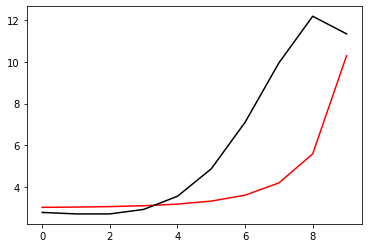

9849 1.1259358452599095 -1.0046170176132834
[ 2.77159204  2.69855386  2.69778575  2.91258624  3.54416769  4.86596531
  7.10215022  9.96449718 12.21751096 11.36465347]


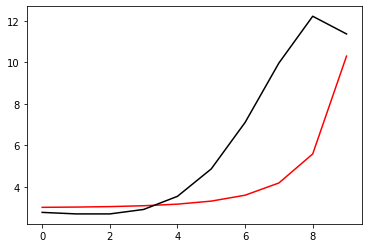

In [93]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.1133052353230934 -1.0046279159947658
[ 2.77373133  2.69937387  2.6954606   2.90967237  3.54172953  4.86381736
  7.1008217   9.97387596 12.24462643 11.38135814]


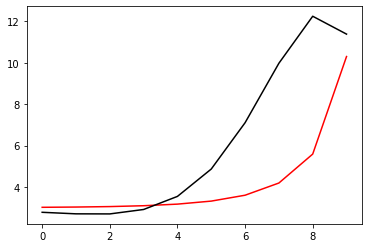

402 2.427751673473438 -1.0045037941013624
[ 2.77444505  2.69947196  2.69460232  2.90819109  3.54036503  4.86283902
  7.10047762  9.97970942 12.26089137 11.39136913]


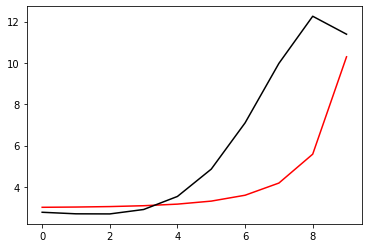

603 0.10978423240454627 -1.004378842328074
[ 2.77514629  2.69956994  2.69374497  2.90671739  3.53902243  4.86188301
  7.10012636  9.985453   12.27706884 11.40126675]


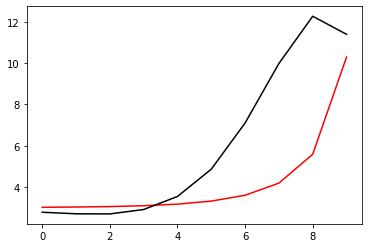

804 0.10702692826248372 -1.0042630884778099
[ 2.77583105  2.69966958  2.69290079  2.90526183  3.53769011  4.86091179
  7.09972664  9.99106577 12.29311328 11.41108858]


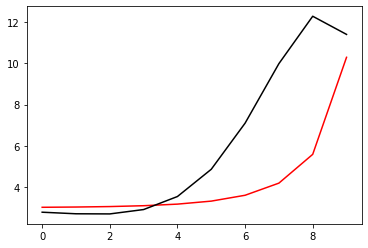

1005 0.13228902868190773 -1.0041679007574282
[ 2.7765524   2.69982251  2.69212197  2.9038727   3.53640436  4.85994524
  7.09928411  9.99654236 12.30901285 11.42084032]


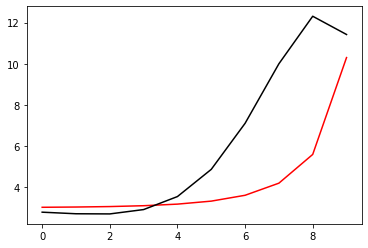

1206 2.1001260758095524 -1.0040816855875452
[ 2.77725376  2.69997625  2.69136132  2.9025066   3.5351243   4.8589499
  7.09878113 10.00187825 12.32476911 11.43052615]


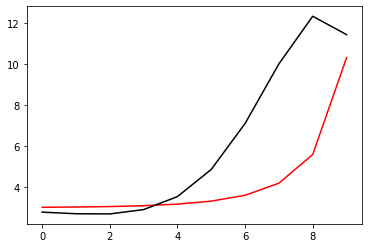

1407 0.10318043388309504 -1.0040017274631277
[ 2.77793421  2.70012983  2.69061863  2.90116322  3.53384825  4.85792355
  7.09821638 10.0070732  12.34038219 11.44014767]


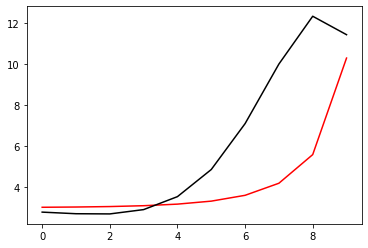

1608 0.10374436692315718 -1.0039289863729732
[ 2.77859082  2.70027958  2.68989014  2.89983838  3.53257151  4.85686247
  7.09758867 10.01212844 12.35585434 11.44970248]


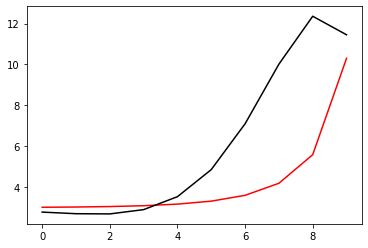

1809 1.1119601298003479 -1.0038635473631552
[ 2.77924233  2.70044503  2.68919686  2.89855439  3.53131714  4.85578917
  7.0969163  10.01705726 12.37119533 11.45918474]


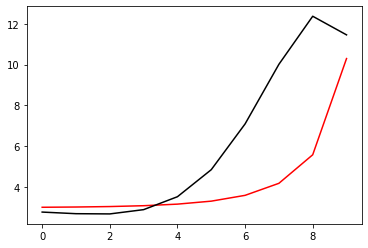

2010 1.1058489826888318 -1.0038021451823413
[ 2.77987034  2.70060599  2.68851712  2.89728808  3.53006124  4.85468213
  7.09618421 10.02185177 12.386401   11.46858766]


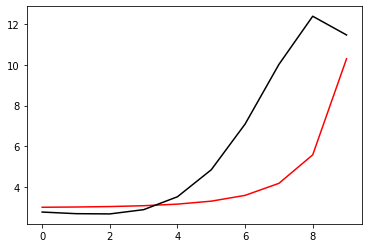

2211 2.1074342701368916 -1.0037540175278188
[ 2.78048827  2.70077327  2.68785964  2.8960464   3.52880967  4.85354724
  7.09539832 10.02651816 12.40147706 11.47790455]


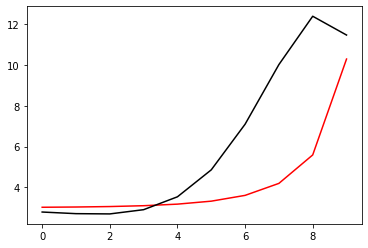

2412 2.5633490206056186 -1.0038987135712003
[ 2.78123738  2.70110104  2.68739425  2.89501858  3.52777535  4.85261738
  7.09478567 10.03125759 12.41660198 11.48713075]


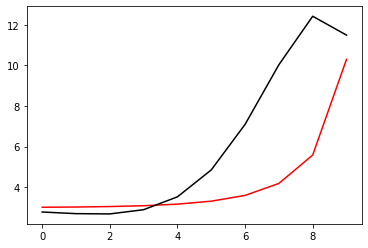

2613 0.10566529605174653 -1.0040292472232257
[ 2.78195038  2.70140908  2.68692535  2.89398949  3.52671934  4.85163527
  7.09409944 10.03585571 12.43158658 11.49628412]


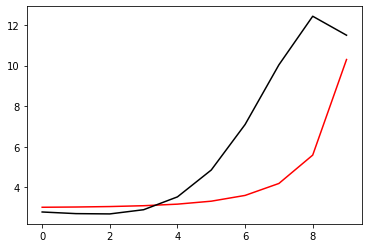

2814 0.10793889018636295 -1.0041481434432824
[ 2.78263069  2.70169995  2.68645498  2.89296087  3.52564375  4.85060416
  7.09334347 10.04031692 12.44643455 11.50537899]


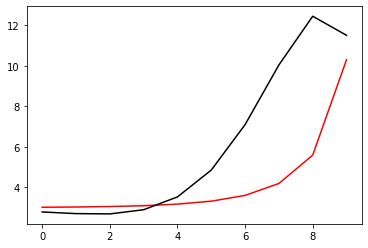

3015 0.12769889352181535 -1.0042721780075072
[ 2.78336758  2.70205792  2.68606267  2.892007    3.5246155   4.84957775
  7.09255038 10.04465552 12.46114939 11.51442393]


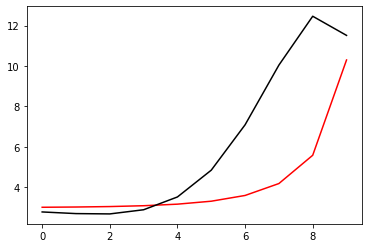

3216 2.103029321946267 -1.0043811760548207
[ 2.78407061  2.70239837  2.68566997  2.89105664  3.52357387  4.84851286
  7.09170046 10.04887118 12.47573936 11.52342081]


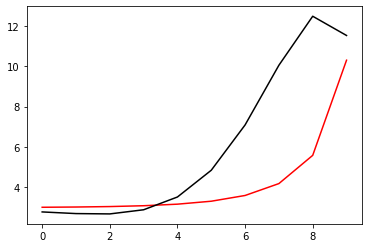

3417 0.11334636006725235 -1.004469683416079
[ 2.78474267  2.70272383  2.68527927  2.89011214  3.52252144  4.84741236
  7.09079607 10.05296596 12.49020523 11.53236595]


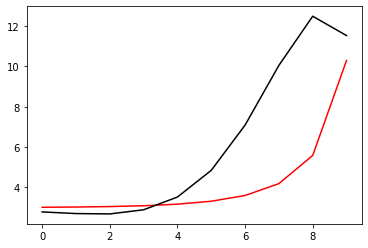

3618 0.11497030944115572 -1.0045382795566
[ 2.78538477  2.70303454  2.68489028  2.889173    3.52145817  4.84627742
  7.08983932 10.05694309 12.50454951 11.54125141]


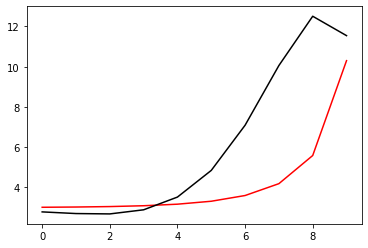

3819 1.1284600470988246 -1.0045813109956498
[ 2.78600933  2.70334392  2.68451767  2.88825526  3.52040147  4.84512571
  7.08884528 10.06081445 12.51878053 11.55006716]


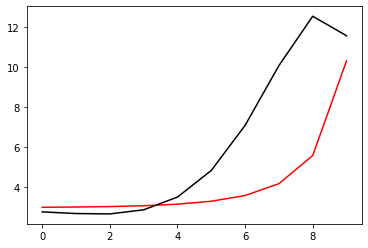

4020 1.139318350994991 -1.004583323084743
[ 2.78661554  2.70364906  2.68415627  2.8873513   3.51934133  4.8439452
  7.08780095 10.06456808 12.5328862  11.5588041 ]


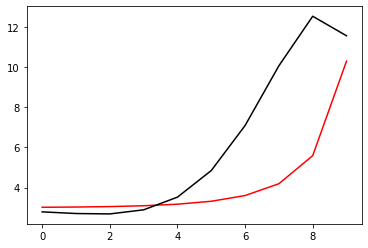

4221 2.113811583555582 -1.004567337311746
[ 2.78719214  2.70393682  2.68379177  2.88644691  3.5182662   4.84273084
  7.08671019 10.06821554 12.54688056 11.56745439]


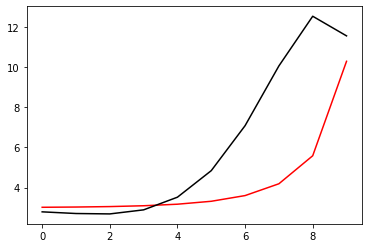

4422 2.3600682813856797 -1.004457809512705
[ 2.78763098  2.70410715  2.6833365   2.88547441  3.51714194  4.84150136
  7.08565355 10.07188167 12.56090623 11.57601438]


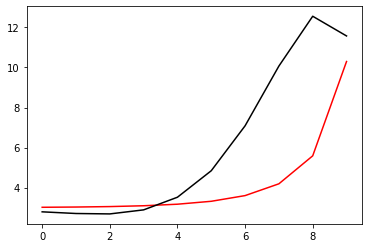

4623 0.11345157488349276 -1.0043441032651304
[ 2.78805492  2.70427466  2.68289237  2.88451489  3.51601406  4.84024429
  7.08454851 10.07543466 12.57480875 11.58450081]


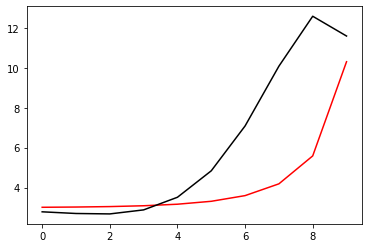

4824 0.11015872073089267 -1.004237358870079
[ 2.78846713  2.70444162  2.68246103  2.88356987  3.51488492  4.83896384
  7.08340119 10.07888231 12.58859518 11.59292837]


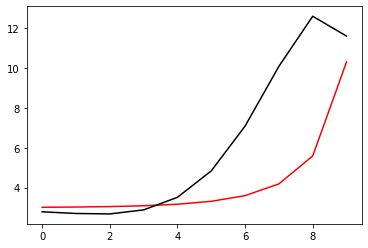

5025 0.12923723927972328 -1.0041443662141991
[ 2.78891205  2.70464863  2.68207936  2.88267261  3.51378368  4.83768331
  7.08222659 10.0822328  12.60226838 11.60130808]


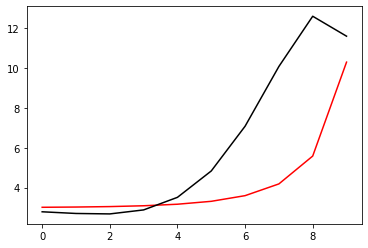

5226 2.102363947067887 -1.004059780932969
[ 2.78934204  2.70485184  2.68170761  2.88178823  3.51268234  4.83638477
  7.08101898 10.08549062 12.61583656 11.60964602]


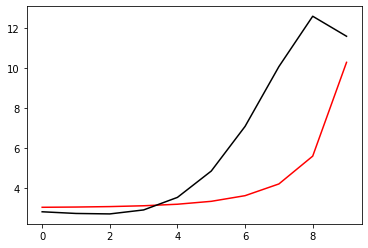

5427 0.1059694332832897 -1.0039808013692824
[ 2.78975679  2.70505059  2.68134487  2.88091585  3.51158055  4.83506875
  7.07977967 10.08865812 12.62930118 11.61794366]


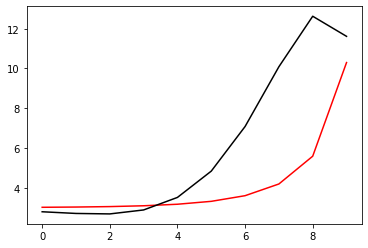

5628 0.10643143088627488 -1.0039086691158658
[ 2.79015347  2.70524123  2.68098686  2.88005109  3.51047462  4.83373323
  7.07850875 10.09173784 12.64266464 11.6261983 ]


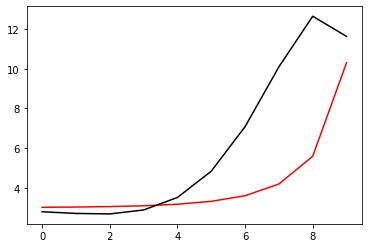

5829 1.11268609228214 -1.0038430590595313
[ 2.79054853  2.70544059  2.68065086  2.87921176  3.50938283  4.83239577
  7.077221   10.09474163 12.65593525 11.63440417]


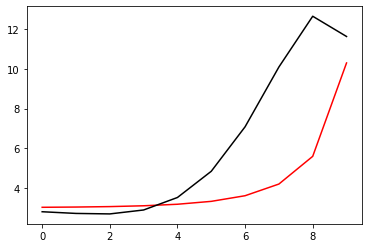

6030 1.1085620771841114 -1.0037810754638161
[ 2.79092667  2.70563207  2.68031912  2.87837947  3.50828724  4.83104076
  7.07590507 10.09766329 12.66910863 11.64255476]


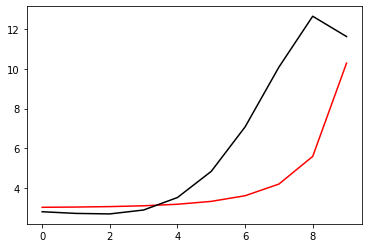

6231 2.1067215996847346 -1.0037315270288567
[ 2.79129473  2.70581972  2.67999323  2.87755414  3.50718734  4.82966863
  7.07456334 10.10050772 12.68218973 11.65064348]


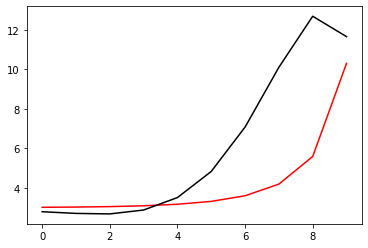

6432 2.502913850673326 -1.003883872056867
[ 2.79184205  2.70620335  2.67988417  2.87695891  3.50631841  4.82852083
  7.07342744 10.10348511 12.69536801 11.6586654 ]


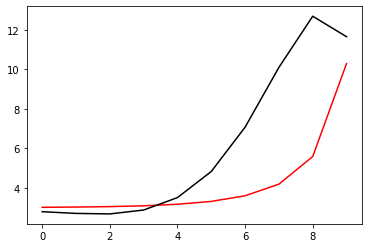

6633 0.10842719043625691 -1.004020578125105
[ 2.79235514  2.70655971  2.679758    2.87634816  3.50542331  4.82733491
  7.07224661 10.1063701  12.70843882 11.6666391 ]


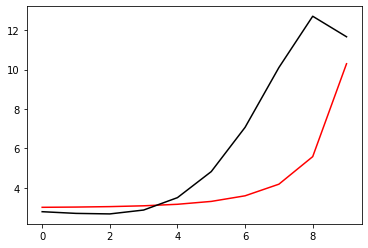

6834 0.11056435416610694 -1.004144260766853
[ 2.79283743  2.70689148  2.67961675  2.87572364  3.50450405  4.8261134
  7.07102372 10.10916629 12.72140485 11.67457813]


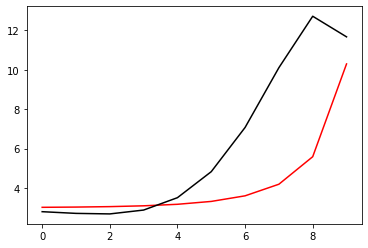

7035 0.1271899016355617 -1.0042638312155774
[ 2.79335328  2.70725824  2.67951518  2.87513503  3.50360402  4.82489033
  7.06978001 10.11188392 12.7342685  11.68248923]


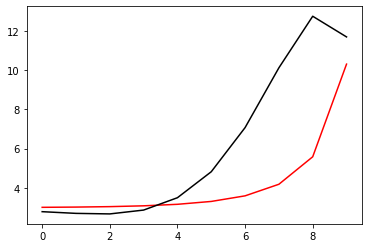

7236 2.1051833423950113 -1.004368400942418
[ 2.79384235  2.70760549  2.67940475  2.87454051  3.50268995  4.82364382
  7.06850695 10.11452595 12.74703772 11.69037209]


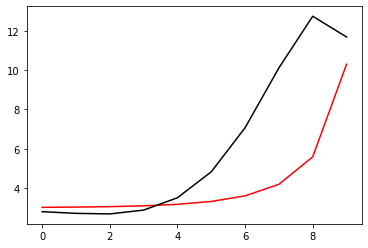

7437 0.11661394924439626 -1.0044514505008546
[ 2.79430765  2.70793602  2.67928795  2.87394243  3.50176415  4.82237583
  7.06720563 10.11709323 12.75971192 11.69822105]


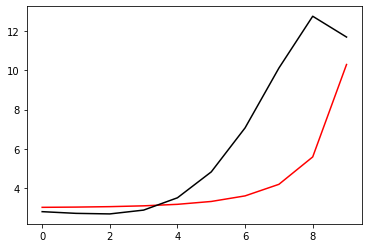

7638 0.11803107227628061 -1.0045136622348967
[ 2.79475017  2.70825024  2.67916467  2.8733405   3.50082668  4.82108707
  7.06587743 10.11958825 12.772293   11.70602654]


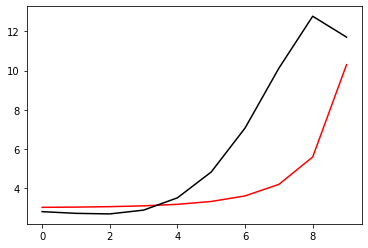

7839 1.1300776996534758 -1.0045490069961462
[ 2.79518116  2.70856013  2.67904758  2.87274815  3.49989151  4.81979112
  7.06453393 10.12202057 12.78478772 11.7137775 ]


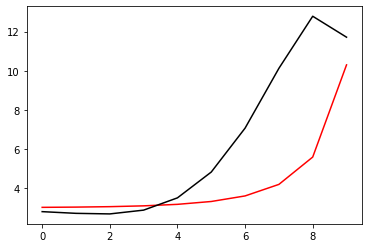

8040 1.141879869793911 -1.0045405479778367
[ 2.79560108  2.70886442  2.67893342  2.87216011  3.49895142  4.81847869
  7.06316413 10.12437905 12.79718415 11.72146423]


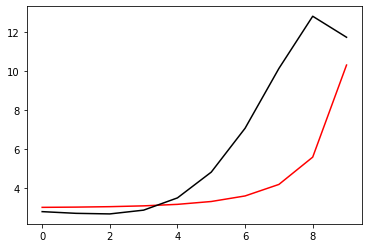

8241 2.113277109044473 -1.004514633278503
[ 2.79599575  2.70914733  2.67880551  2.87156029  3.49799336  4.8171431
  7.06177032 10.12667467 12.8094971  11.72907875]


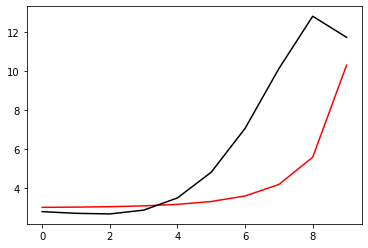

8442 2.318271959209447 -1.0044155858646882
[ 2.79629146  2.70934495  2.67861264  2.8709154   3.4970106   4.81581553
  7.06042805 10.12901886 12.82185492 11.73661778]


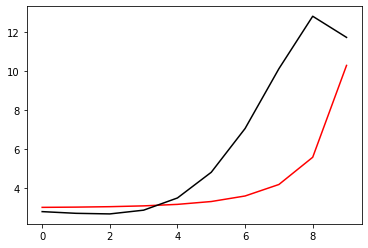

8643 0.11590705006472667 -1.0043098738854817
[ 2.796576    2.70953533  2.67841966  2.87027135  3.4960202   4.81447017
  7.05905984 10.13129323 12.83411754 11.74409695]


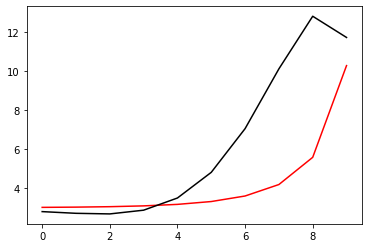

8844 0.11238347560304225 -1.0042097721262448
[ 2.79685264  2.70972093  2.67822836  2.86962972  3.4950243   4.81311037
  7.05767056 10.13350442 12.84629149 11.75153053]


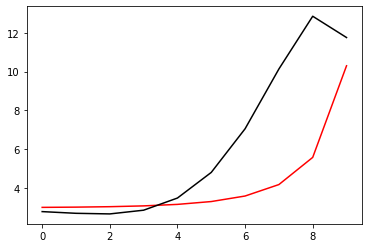

9045 0.12733891411508752 -1.0041187009664572
[ 2.79715407  2.70993105  2.67806467  2.86901328  3.49404238  4.81175136
  7.05627015 10.13565815 12.85837886 11.75892981]


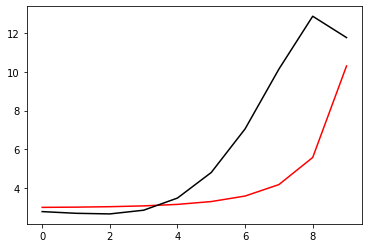

9246 2.1039410335945297 -1.0040357424934414
[ 2.79744596  2.7101351   2.67790178  2.86839958  3.49305744  4.81038322
  7.05485671 10.13775973 12.87038797 11.76630164]


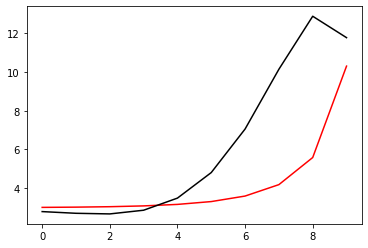

9447 0.10801253830827899 -1.0039579326888242
[ 2.79772839  2.71033296  2.67773937  2.86778828  3.49206944  4.80900623
  7.05343081 10.13981049 12.88231958 11.7736486 ]


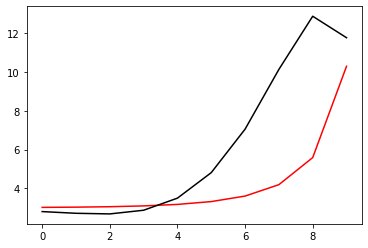

9648 0.10849294898613802 -1.003886760578895
[ 2.79799849  2.71052121  2.67757352  2.86717543  3.49107502  4.80761825
  7.05199199 10.14181207 12.89417572 11.78096911]


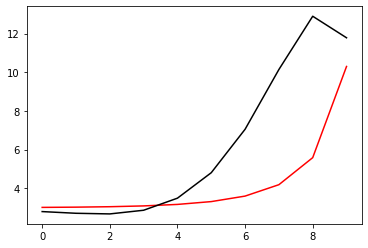

9849 1.1133329742238713 -1.003821537878876
[ 2.79826978  2.71071361  2.67741816  2.86657516  3.49008837  4.80623275
  7.05055178 10.14377422 12.90596374 11.78825831]


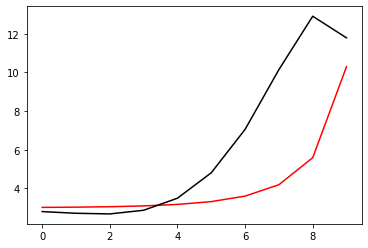

In [94]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.1050429557258026 -1.003848387674703
[ 2.79970968  2.71171618  2.67750458  2.86557771  3.4881275   4.80334282
  7.04739256 10.14622528 12.92518854 11.80021744]


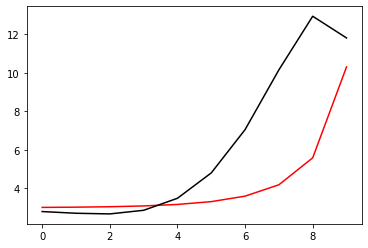

402 2.44013770744325 -1.003893913262956
[ 2.80020771  2.71192666  2.67719033  2.86466885  3.48671519  4.8014906
  7.04551828 10.14768205 12.9364961  11.80695172]


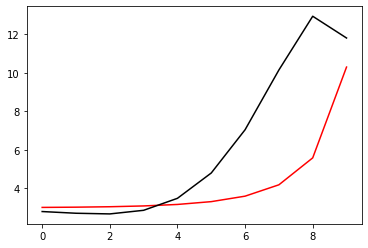

603 0.11344501046736559 -1.0041649300720161
[ 2.80099825  2.71245817  2.67722543  2.86413112  3.48568197  4.80000942
  7.0439857  10.14940956 12.94801477 11.81398159]


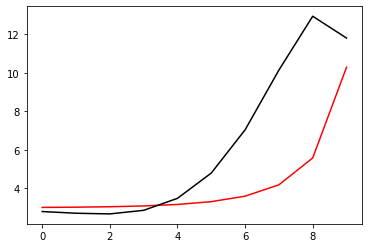

804 0.11298778228965019 -1.0041663138693426
[ 2.80138646  2.71264412  2.67696794  2.86334588  3.48443633  4.79834659
  7.04230115 10.15098236 12.95936531 11.82094208]


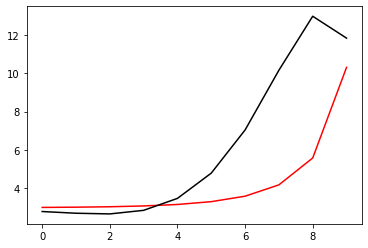

1005 0.12879846393341876 -1.0043300747637491
[ 2.80193334  2.71300772  2.67690814  2.86277492  3.4834153   4.79691477
  7.0408477  10.15274865 12.97086201 11.82804236]


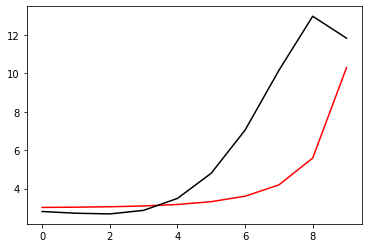

1206 2.109005283803385 -1.0044886341229236
[ 2.80253382  2.71343205  2.67691629  2.86227391  3.48245747  4.79553292
  7.0394263  10.15449999 12.98229567 11.83513933]


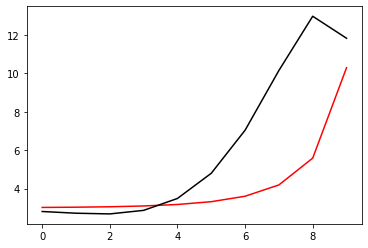

1407 0.12457451905726709 -1.0045448739482028
[ 2.80290118  2.71366644  2.67677654  2.86166223  3.48142115  4.79410602
  7.03799599 10.15624513 12.9937064  11.84221222]


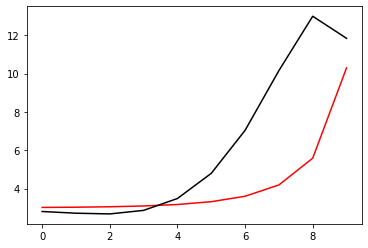

1608 0.11750395056394589 -1.0044237565014897
[ 2.80331847  2.71395944  2.67670383  2.86112063  3.48044973  4.79273326
  7.0366052  10.15798713 13.00506916 11.84927076]


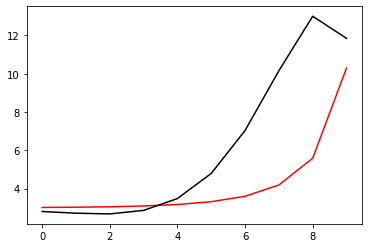

1809 1.1298641247131533 -1.0045019754674465
[ 2.80367627  2.71421043  2.67660971  2.86057657  3.47949193  4.79139235
  7.0352666  10.15976739 13.01643608 11.85632882]


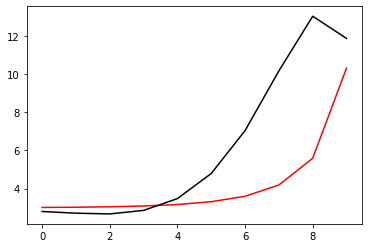

2010 1.141373707255979 -1.0044899511179128
[ 2.80405221  2.71448958  2.67655548  2.86008082  3.47858573  4.79010497
  7.03398288 10.16157337 13.0277876  11.86337821]


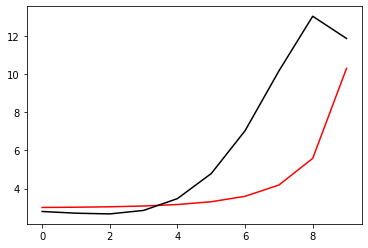

2211 2.1115585904858865 -1.0044436676077917
[ 2.8044486   2.7147932   2.67653233  2.85962098  3.47771735  4.7888589
  7.03274663 10.16340468 13.03912938 11.87039597]


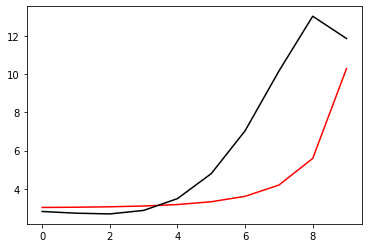

2412 2.2920287233581442 -1.0043686597794654
[ 2.80469199  2.71495849  2.67638831  2.85905711  3.4767617   4.78754902
  7.03147876 10.16520979 13.0504308  11.87729745]


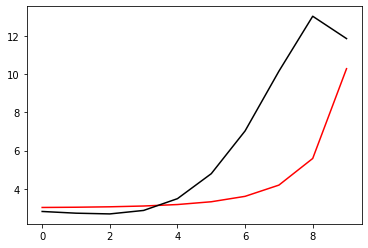

2613 0.11939485603759015 -1.0043107184608462
[ 2.80512615  2.71530613  2.67642212  2.85866631  3.47597287  4.78640181
  7.03037118 10.16714473 13.06181974 11.88423125]


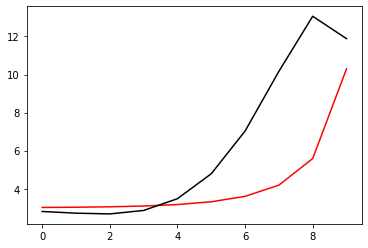

2814 0.1148751173405561 -1.0042242999061988
[ 2.80535131  2.71545368  2.67626441  2.85808692  3.47499002  4.78505022
  7.02904847 10.1688325  13.07292673 11.89101441]


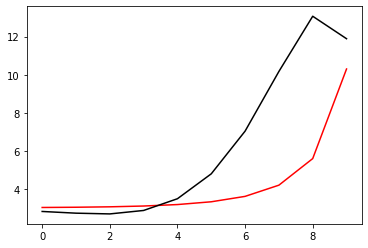

3015 0.12536281701934224 -1.0041509797568495
[ 2.80563902  2.71565873  2.67616175  2.8575593   3.47405419  4.78374374
  7.02777324 10.1705471  13.08403106 11.8978056 ]


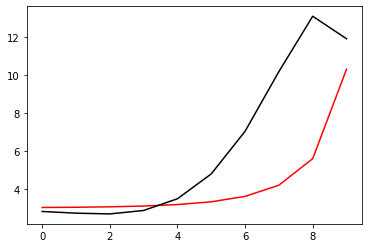

3216 2.1056625517101155 -1.0040967027484544
[ 2.80594164  2.71587747  2.67607382  2.85704584  3.47312897  4.78244512
  7.02650531 10.17224419 13.0950834  11.90458523]


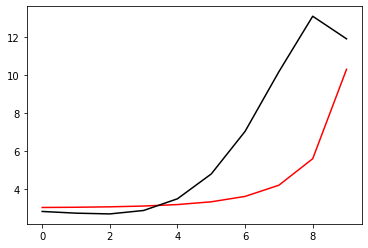

3417 0.1100422654925966 -1.0039532186269753
[ 2.8061125   2.71597117  2.67586858  2.85641981  3.47209135  4.78103356
  7.02512575 10.17380824 13.10597246 11.91128649]


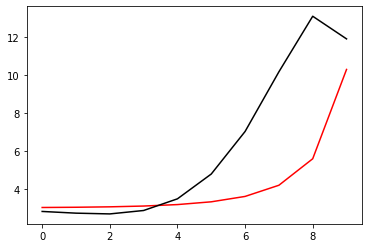

3618 0.11096059778995676 -1.0039673187093094
[ 2.80647725  2.71624955  2.6758433   2.85597122  3.47123123  4.779807
  7.02394528 10.17555951 13.11701895 11.91810539]


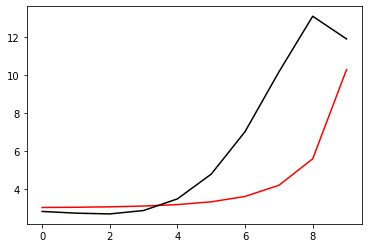

3819 1.1143617045902865 -1.0038688562955085
[ 2.80669894  2.71638807  2.67568211  2.8553871   3.47022994  4.7784304
  7.02260539 10.17712035 13.12783784 11.924793  ]


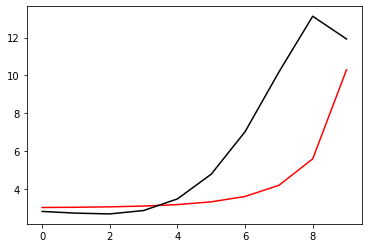

4020 1.1142333596770866 -1.0038816074077128
[ 2.80706176  2.71665954  2.67564926  2.85492786  3.46935106  4.77717885
  7.02139811 10.17879708 13.1387404  11.93154675]


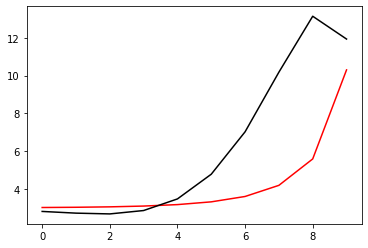

4221 2.1057726123079483 -1.0037149674179853
[ 2.80713615  2.71666005  2.675365    2.85423676  3.46826056  4.77574318
  7.02004372 10.18034074 13.14950031 11.93819967]


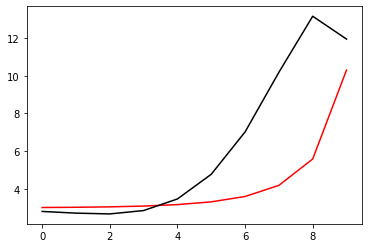

4422 2.3552914089851678 -1.0039748973844798
[ 2.80769465  2.71712638  2.67553242  2.85398474  3.46759671  4.77472339
  7.01909274 10.18224673 13.16056684 11.94492849]


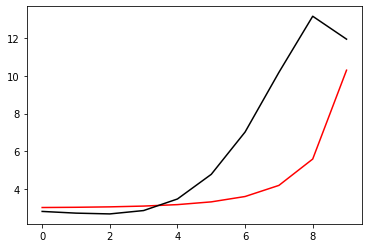

4623 0.1136414692765224 -1.0040445144013024
[ 2.80802451  2.71737297  2.67549003  2.85353085  3.46673574  4.77351191
  7.01795872 10.18395719 13.17141079 11.95152223]


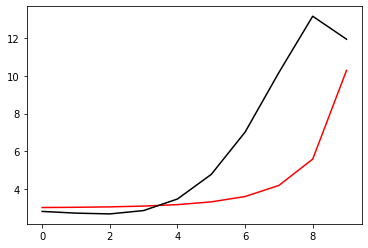

4824 0.11616877876532358 -1.0042503482519978
[ 2.80849259  2.71774376  2.6755622   2.85318472  3.46597879  4.77240832
  7.01694402 10.1857763  13.18233275 11.95822215]


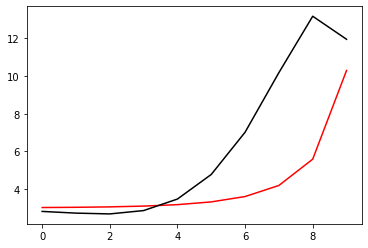

5025 0.1301732656538393 -1.004314054643447
[ 2.80883831  2.71799696  2.67552256  2.85273075  3.46511459  4.77119764
  7.01582338 10.18746887 13.19309346 11.96483514]


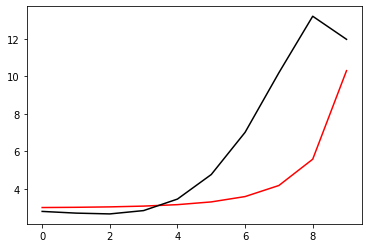

5226 2.1098036771613593 -1.0044400664639808
[ 2.80925489  2.71830833  2.67553221  2.85231945  3.46428866  4.77002706
  7.01475139 10.18919793 13.20385935 11.97150137]


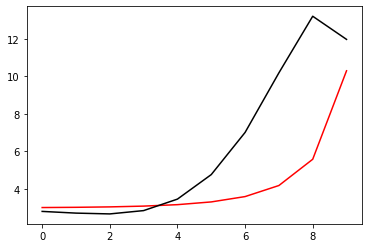

5427 0.12373684372131405 -1.004467666943776
[ 2.80960051  2.71855599  2.67548622  2.85185914  3.46341761  4.76881528
  7.01364274 10.19087208 13.214535   11.97811797]


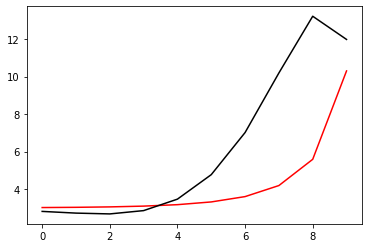

5628 0.12507887115541924 -1.0045246250181603
[ 2.80997556  2.71882076  2.67544899  2.85140229  3.46254822  4.76761154
  7.01255736 10.19256537 13.22520351 11.98475294]


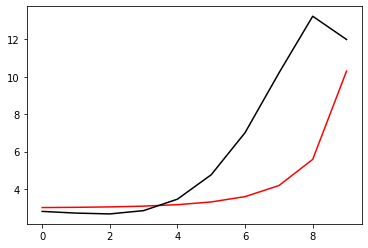

5829 1.134529630214919 -1.0045263469385015
[ 2.81034139  2.71907813  2.67540707  2.85094224  3.46167432  4.76640112
  7.01146243 10.19422399 13.23579619 11.99133854]


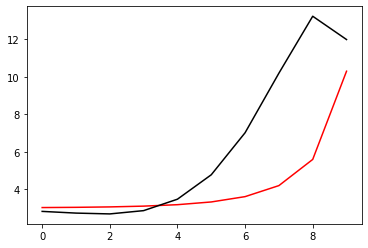

6030 1.1432373701304261 -1.0044594137249911
[ 2.81069904  2.71931716  2.67533974  2.85045186  3.46076737  4.76516109
  7.01034838 10.19585524 13.2463323  11.9978758 ]


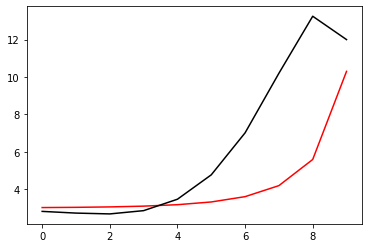

6231 2.111660212297329 -1.00441449902911
[ 2.81107544  2.7195738   2.67529045  2.84998039  3.45987999  4.76394393
  7.00926312 10.19750005 13.25684635 12.0043899 ]


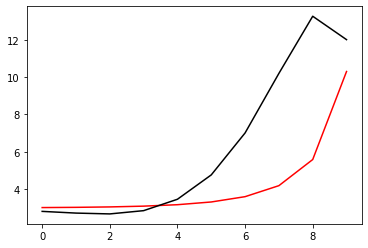

6432 2.2662130736523975 -1.0042802927465073
[ 2.81138724  2.71976316  2.67517583  2.84945106  3.45895038  4.7627153
  7.00821325 10.19920917 13.26741914 12.01082837]


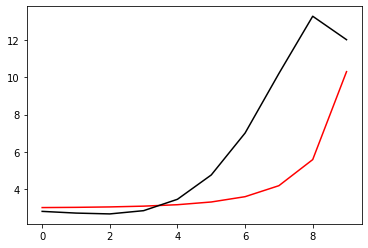

6633 0.11801906011515378 -1.0041739528143256
[ 2.81174056  2.71999069  2.67509728  2.84895574  3.45805169  4.7615155
  7.00719107 10.20092439 13.27795746 12.01725748]


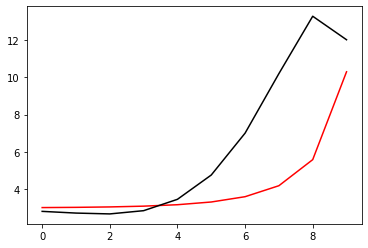

6834 0.11607712186267768 -1.004058171756696
[ 2.81205189  2.72016597  2.67495914  2.84839636  3.45708785  4.76025706
  7.00612547 10.20259481 13.28842558 12.02363206]


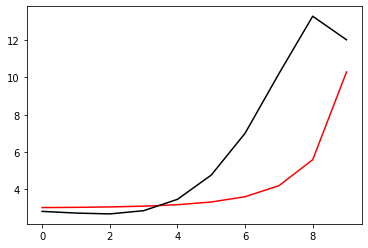

7035 0.12562314089664559 -1.003958589979585
[ 2.8124163   2.72038922  2.67486555  2.84787928  3.45616474  4.75904103
  7.00510709 10.20429781 13.29888954 12.03003247]


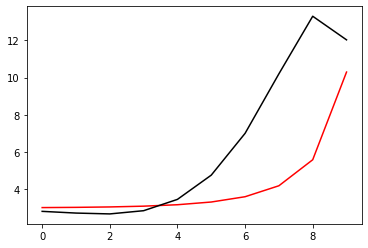

7236 2.107485171025341 -1.003870931679565
[ 2.81273658  2.72055848  2.67471086  2.84729699  3.45517599  4.7577667
  7.0040466  10.20595876 13.30928616 12.03640297]


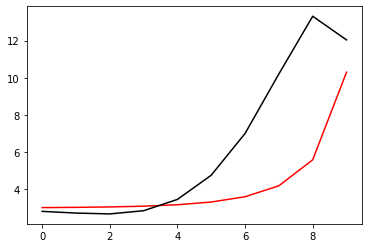

7437 0.11176620640982401 -1.003776547526046
[ 2.81309445  2.72076114  2.67458697  2.84674443  3.45421729  4.75652695
  7.00302938 10.20765298 13.31968172 12.04279504]


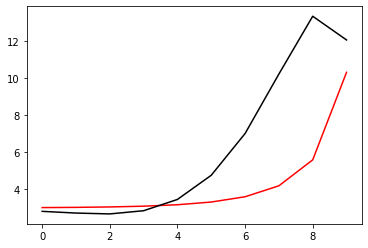

7638 0.11318184747909671 -1.003723206456675
[ 2.81341898  2.72091932  2.67440991  2.84613292  3.45319723  4.75523051
  7.00196811 10.20930028 13.33000242 12.04916891]


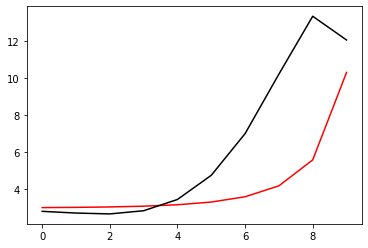

7839 1.115647169575833 -1.0036386161148754
[ 2.81378926  2.72111958  2.67427302  2.84556185  3.45222049  4.75398604
  7.00097324 10.21101034 13.34035493 12.05556344]


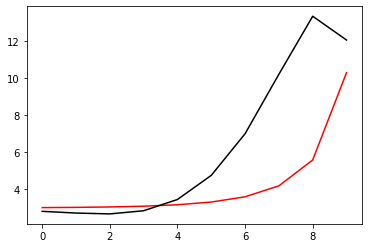

8040 1.114961222261365 -1.0035911293179725
[ 2.81411825  2.72126766  2.67407534  2.84492449  3.45117576  4.75267946
  6.99993064 10.21267228 13.35063235 12.06193535]


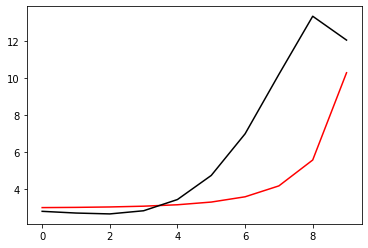

8241 2.1097074799284035 -1.0035233922609625
[ 2.81446684  2.72142703  2.67388277  2.84428923  3.45013412  4.75138465
  6.99891672 10.21436414 13.36091243 12.0682982 ]


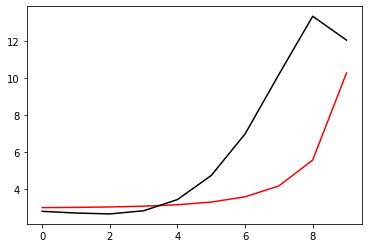

8442 2.417941251885205 -1.0037182280793646
[ 2.81507025  2.72182978  2.67392364  2.84387945  3.44931163  4.75030589
  6.99811768 10.21625076 13.37134168 12.07462035]


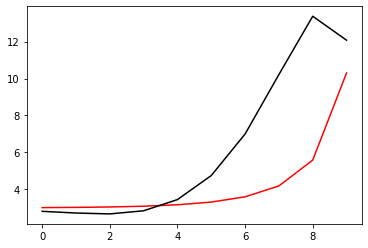

8643 0.11490939396282611 -1.0038104362055946
[ 2.81569267  2.72224574  2.67397389  2.8434788   3.44850301  4.74925501
  6.99737051 10.21819836 13.38180917 12.08098306]


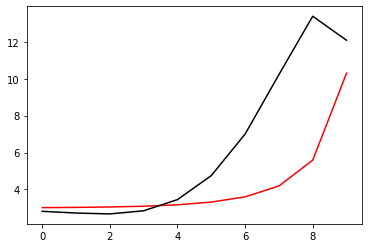

8844 0.11754787898539731 -1.0039478928936043
[ 2.81624091  2.72257623  2.67392954  2.84297809  3.44759373  4.74811177
  6.9965495  10.22007793 13.39218512 12.08733073]


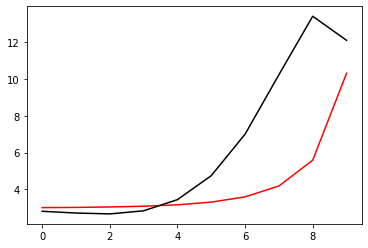

9045 0.12620790136549598 -1.0040706487891737
[ 2.81683296  2.72293892  2.67390736  2.84249218  3.44669479  4.74697984
  6.99574648 10.22196747 13.40253656 12.09370653]


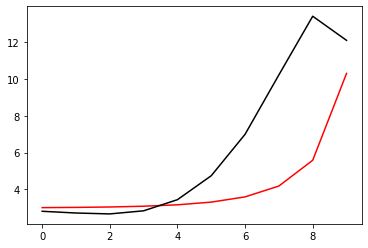

9246 2.1087507643193786 -1.0041378335414
[ 2.81738752  2.72325464  2.6738311   2.84194981  3.44574383  4.74581225
  6.99493748 10.22386857 13.41288195 12.1001083 ]


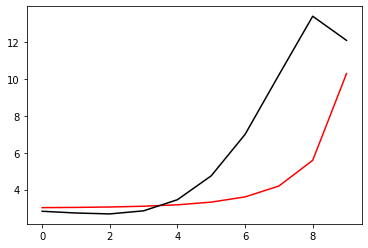

9447 0.11772486125274992 -1.004209512255677
[ 2.8179333   2.7235524   2.67372965  2.84137892  3.44476639  4.74462954
  6.99413501 10.22578482 13.42321799 12.10652761]


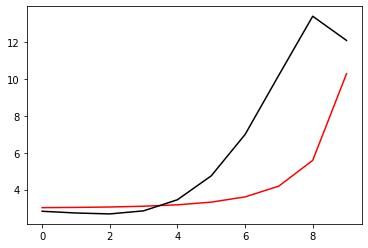

9648 0.1191140477005675 -1.004270171057426
[ 2.8184805   2.72384097  2.67360983  2.84078349  3.44376176  4.74342332
  6.99331939 10.22768407 13.43350246 12.11293156]


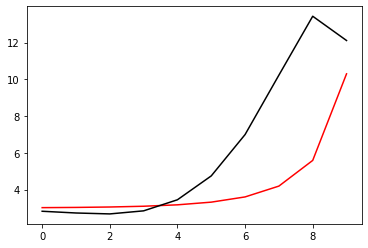

9849 1.128277944505086 -1.0043666405556457
[ 2.81901427  2.72411098  2.67346869  2.84016932  3.44274911  4.74223354
  6.99255999 10.22966783 13.44385923 12.11937622]


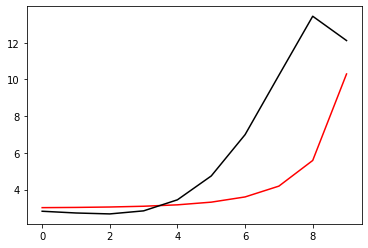

In [95]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.110733552628311 -1.0043205407401072
[ 2.8198197   2.72447213  2.67312885  2.8390193   3.44090961  4.74007594
  6.99111175 10.23282358 13.4611749  12.12995129]


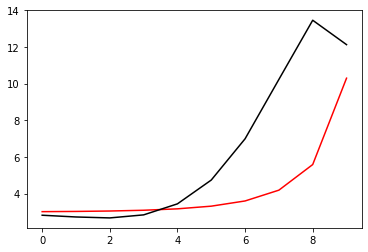

402 2.2460401932384166 -1.0041473099334326
[ 2.82037144  2.72468928  2.67287518  2.83824101  3.43967775  4.73859897
  6.98996765 10.23422626 13.47063603 12.13585018]


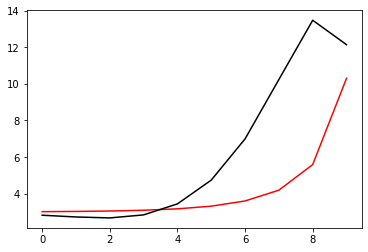

603 0.11977002072811395 -1.0040773464504398
[ 2.82106253  2.72512751  2.67289118  2.83773337  3.43864499  4.73714217
  6.98854517 10.23503737 13.4794127  12.14129546]


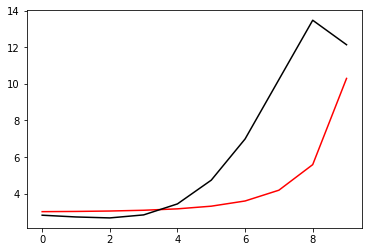

804 0.12013018136626785 -1.003862870530916
[ 2.82175761  2.72544609  2.67267475  2.83690631  3.43725009  4.73535013
  6.986904   10.23580827 13.48832733 12.14676385]


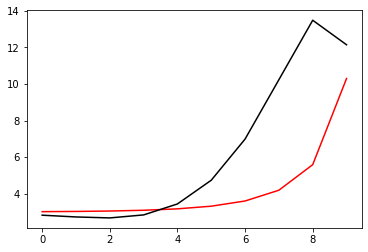

1005 0.1399083913424824 -1.0044049075364334
[ 2.82224462  2.72553551  2.67221242  2.83583103  3.43563117  4.73340226
  6.98523151 10.2367013  13.49749707 12.15217415]


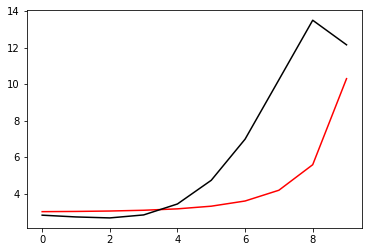

1206 2.111202279345773 -1.0042859213245632
[ 2.82363721  2.72653721  2.67265602  2.83563762  3.4348415   4.73218753
  6.98414329 10.23799925 13.50693057 12.15804699]


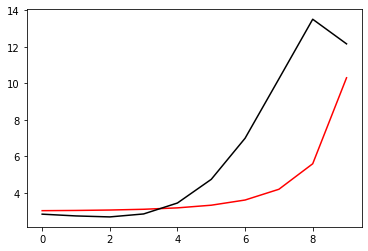

1407 0.1147161322299433 -1.0037055008440314
[ 2.82361334  2.72626851  2.67195906  2.83441232  3.43309944  4.7300628
  6.98214695 10.2383577  13.51539633 12.16324996]


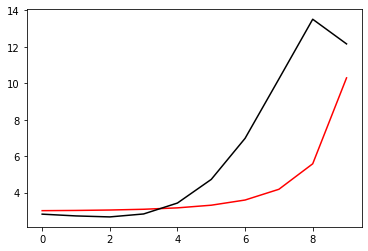

1608 0.11736532277555432 -1.0040996023710884
[ 2.82469149  2.72679536  2.6717894   2.83351553  3.43159822  4.7282575
  6.98075004 10.2397066  13.5251437  12.16928981]


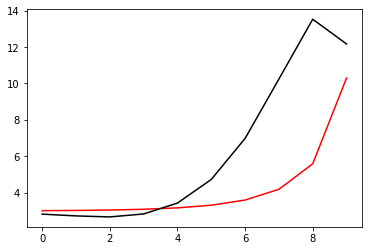

1809 1.1202285191971117 -1.0040272616944212
[ 2.82594617  2.7276246   2.67202868  2.83310577  3.43061643  4.72693653
  6.97971762 10.24122839 13.53486561 12.17538157]


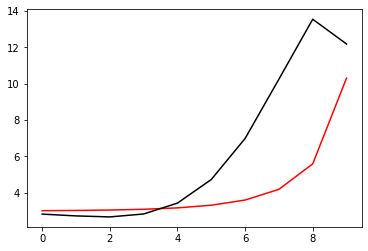

2010 1.1189611233893644 -1.0037171834694336
[ 2.82636111  2.72750677  2.67123306  2.83160947  3.42855381  4.72462872
  6.9779007  10.24221138 13.5441942  12.18105848]


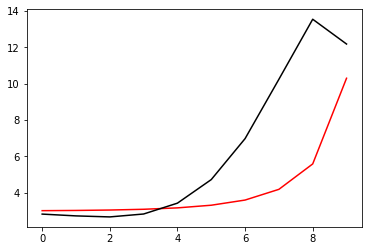

2211 2.112240964347521 -1.0043104028944532
[ 2.82757851  2.72828487  2.67141437  2.83115425  3.42756802  4.72339049
  6.97708735 10.2440628  13.55420402 12.18738574]


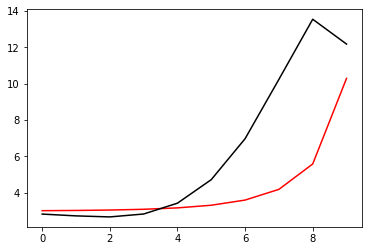

2412 2.2332829627411415 -1.004063238011784
[ 2.82857222  2.72871393  2.67114575  2.83019223  3.42608974  4.72178403
  6.97616559 10.24612665 13.56463076 12.19374719]


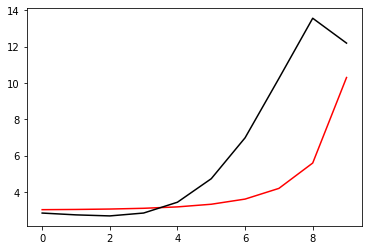

2613 0.12266431882133472 -1.0041228812352836
[ 2.82916895  2.72869585  2.67038907  2.82872112  3.42411236  4.71973706
  6.97492236 10.24800222 13.57491021 12.19993056]


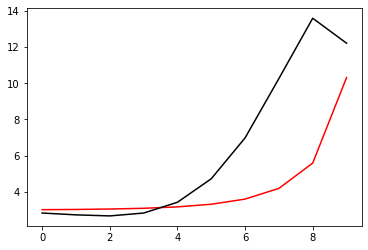

2814 0.12233345372306621 -1.0041754024237297
[ 2.83008997  2.7292395   2.67039345  2.82814637  3.42306012  4.71847978
  6.97412327 10.24982455 13.58468931 12.20578956]


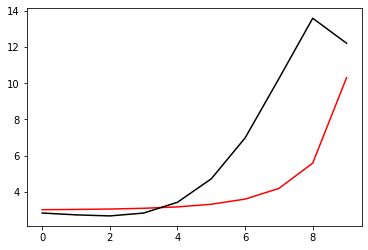

3015 0.13658238676267834 -1.0043068154601502
[ 2.831076    2.72966772  2.67012441  2.82718373  3.42157713  4.71685913
  6.97316776 10.25177949 13.59481323 12.21210412]


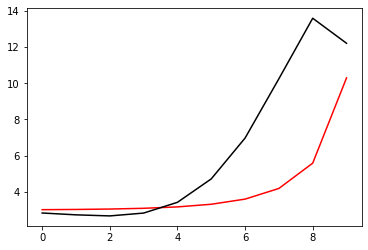

3216 2.112384702519499 -1.0042534221577086
[ 2.83222323  2.7302064   2.66991586  2.8262356   3.42006654  4.71517277
  6.9721119  10.25359064 13.60472147 12.21815013]


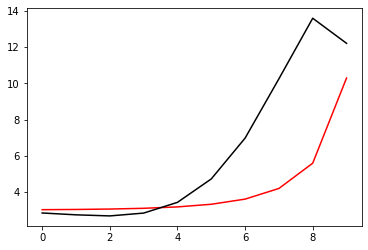

3417 0.12558244765771753 -1.00434541997093
[ 2.83312488  2.73045541  2.66938698  2.82496606  3.41828332  4.71334265
  6.97114265 10.25576082 13.61515183 12.22463632]


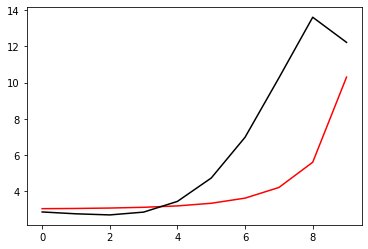

3618 0.1231624452575913 -1.0034146575626175
[ 2.8338436   2.73064404  2.668906    2.82382989  3.41668001  4.71167928
  6.97024776 10.2578325  13.62526581 12.23086492]


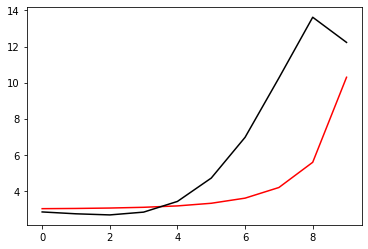

3819 1.1227852666883567 -1.0033173116046727
[ 2.83463499  2.73085292  2.66840061  2.82264264  3.41502887  4.71001864
  6.96946616 10.26015263 13.63569534 12.23731795]


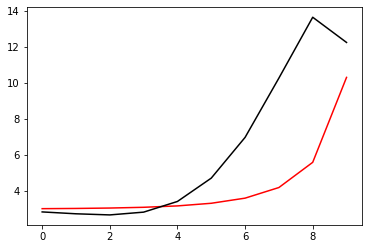

4020 1.1248508789635534 -1.0032682907838149
[ 2.83561464  2.73116664  2.66792126  2.82141236  3.41327829  4.70821874
  6.96852504 10.26229778 13.64590208 12.24364326]


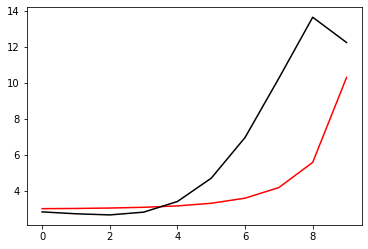

4221 2.1103212303416625 -1.0039726857277367
[ 2.83665713  2.73153173  2.66748596  2.82023053  3.41159989  4.70654594
  6.96780542 10.26476741 13.65646712 12.25028845]


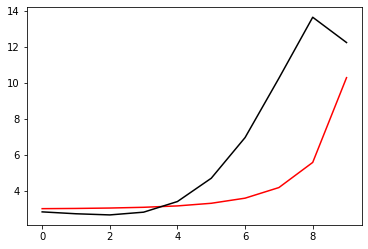

4422 2.2040025178627562 -1.0041287840995363
[ 2.83813424  2.73233828  2.66749125  2.81947702  3.41031557  4.7051958
  6.96728548 10.26726368 13.66686484 12.25664496]


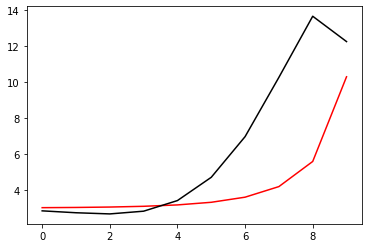

4623 0.125599927267468 -1.0041320388223047
[ 2.838523    2.73217336  2.66663749  2.817974    3.40838905  4.7033124
  6.96634449 10.26943023 13.67695443 12.26264754]


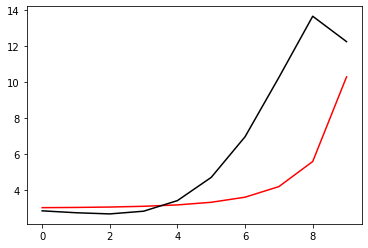

4824 0.12635341506608294 -1.0037462960130772
[ 2.83977964  2.73273341  2.66637082  2.81693454  3.40682498  4.70172178
  6.96566626 10.27186167 13.68731154 12.26894483]


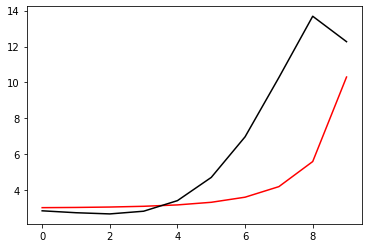

5025 0.13164810558210427 -1.0036601078416334
[ 2.84062941  2.73296777  2.6658595   2.81573665  3.40520062  4.70019283
  6.96520379 10.27466409 13.69811798 12.27571548]


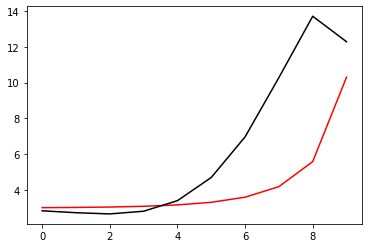

5226 2.120683478523377 -1.0034541583848282
[ 2.84200259  2.73360036  2.66562535  2.81470164  3.40363043  4.69861172
  6.96458269 10.27719818 13.70853492 12.28210953]


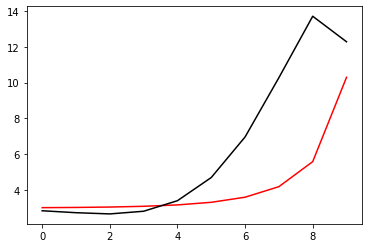

5427 0.13262813342305402 -1.0044396482143687
[ 2.84287639  2.73384198  2.66509816  2.81345914  3.40191965  4.69693072
  6.96386821 10.2796048  13.71875603 12.28838803]


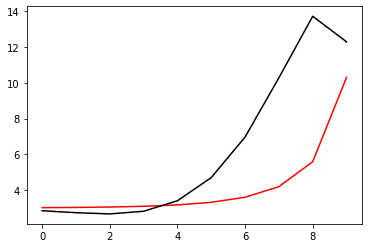

5628 0.12265568349921645 -1.0042008825979012
[ 2.8435426   2.73380762  2.66423374  2.8118372   3.39982094  4.69490765
  6.96293034 10.28195606 13.72905312 12.29475456]


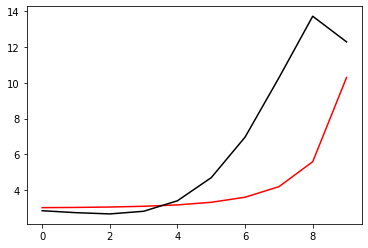

5829 1.1216575297117315 -1.0038724278445164
[ 2.84450822  2.73413143  2.66377467  2.81065119  3.39816078  4.69328115
  6.9622859  10.28444202 13.73931745 12.30118871]


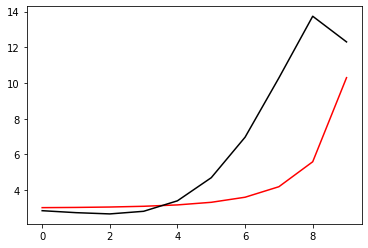

6030 1.1403223909825528 -1.004287420507113
[ 2.84600621  2.73494203  2.66375629  2.80986173  3.39685422  4.69196433
  6.96190352 10.2871334  13.74971403 12.30765526]


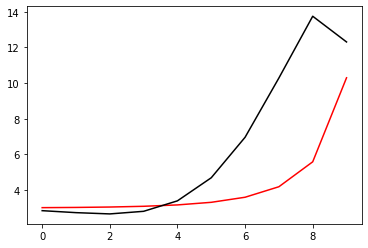

6231 2.11914817784119 -1.0034669357499868
[ 2.84669172  2.73489442  2.66284317  2.80816286  3.39466187  4.68984826
  6.9608939  10.28942337 13.75987338 12.3138508 ]


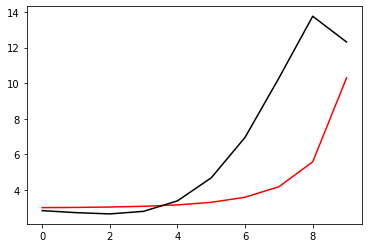

6432 2.3064150083520962 -1.0033771250977066
[ 2.84803876  2.73551707  2.6626032   2.80713329  3.39312255  4.68834774
  6.9604317  10.29216016 13.77036014 12.32020285]


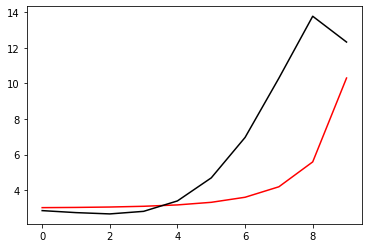

6633 0.12726862623756044 -1.004090084627619
[ 2.84888247  2.73564676  2.66188344  2.80564636  3.39116514  4.68649734
  6.95972784 10.29478357 13.7808155  12.32658475]


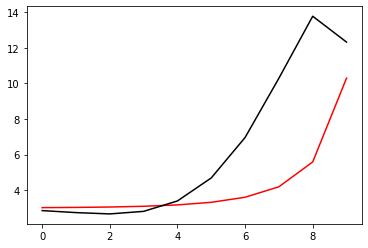

6834 0.12853392950817724 -1.0036541394666525
[ 2.84971669  2.73577365  2.66116859  2.80418009  3.38926079  4.68476193
  6.959242   10.29775092 13.79169932 12.33320078]


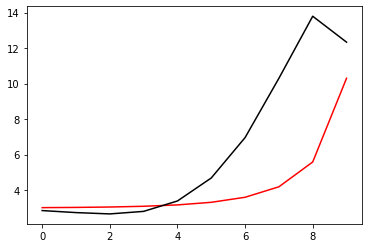

7035 0.13121925170464444 -1.0037781131863006
[ 2.85087803  2.73621619  2.66075255  2.80298573  3.38758073  4.68316621
  6.95875849 10.3005362  13.80221032 12.33973948]


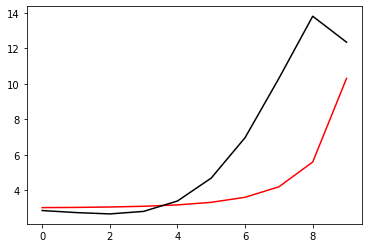

7236 2.128814918885656 -1.0032197001883854
[ 2.8524937   2.73712843  2.66081091  2.80225559  3.38632848  4.68191766
  6.95847911 10.30333027 13.81254299 12.34610892]


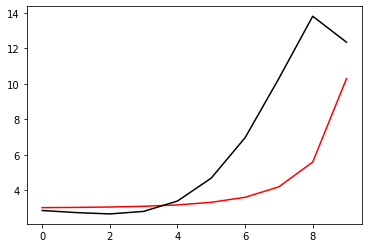

7437 0.12027096212000425 -1.0036814264262965
[ 2.85283499  2.73668751  2.65945544  2.80009122  3.38369373  4.67945829
  6.9573276  10.30571705 13.82287002 12.35248789]


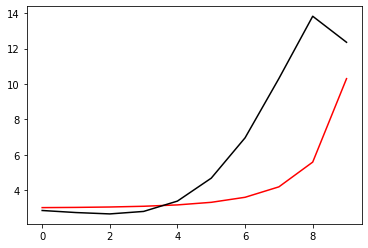

7638 0.1220249891441967 -1.0040672656045024
[ 2.85367425  2.73685231  2.65879206  2.79866884  3.38178781  4.67761177
  6.9565306  10.30808272 13.83282446 12.35863741]


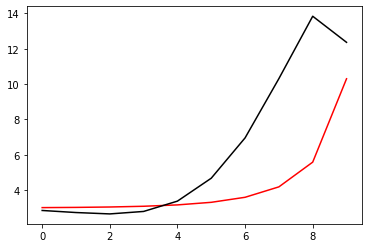

7839 1.129032328180664 -1.0042335191133496
[ 2.85440332  2.73682847  2.65786535  2.79692138  3.37951745  4.67539584
  6.95540574 10.3102031  13.84262133 12.36474094]


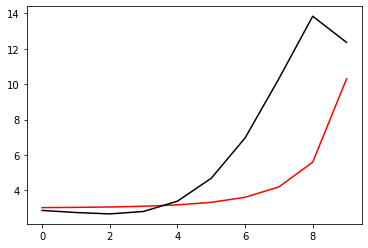

8040 1.1237945395774942 -1.003795235385174
[ 2.85553389  2.73723701  2.65739495  2.7956474   3.37772757  4.6736516
  6.9547214  10.31270789 13.85273053 12.3709624 ]


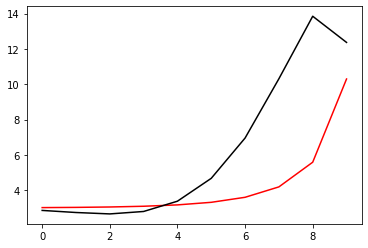

8241 2.110040316637118 -1.0039666330649422
[ 2.85679143  2.73773826  2.65698639  2.79441666  3.37598498  4.67199613
  6.95421876 10.31552298 13.86324788 12.3775078 ]


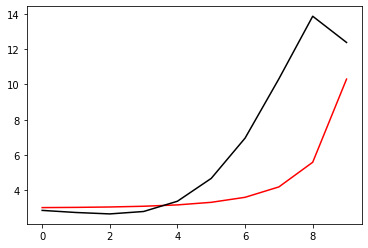

8442 2.2211648212309543 -1.0035827726784945
[ 2.85818295  2.73846916  2.65689149  2.7935667   3.3746635   4.67076126
  6.9540805  10.31859241 13.87389365 12.38390976]


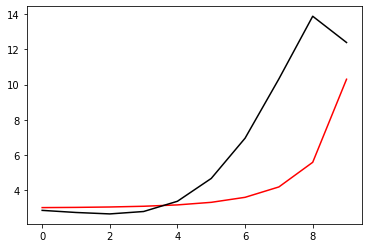

8643 0.12567924164441535 -1.0039581229711285
[ 2.85905926  2.73857916  2.65607985  2.79192596  3.37251397  4.66871869
  6.95323395 10.3211181  13.8841458  12.39011977]


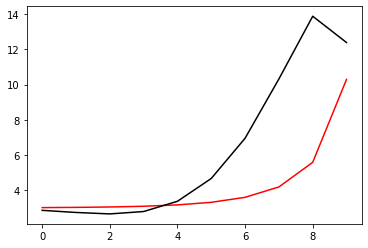

8844 0.125910926647269 -1.0040331822784323
[ 2.86011824  2.73889752  2.65550076  2.79054287  3.37065036  4.66699731
  6.95275399 10.32405504 13.89481978 12.39673872]


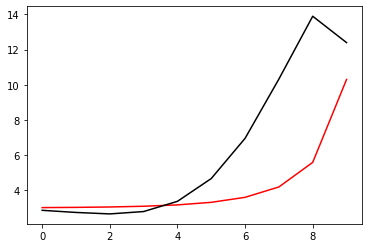

9045 0.13233440913566655 -1.0040567177703432
[ 2.86100493  2.73910842  2.65486991  2.78915133  3.36880231  4.66528596
  6.95223851 10.32687413 13.90528914 12.40315006]


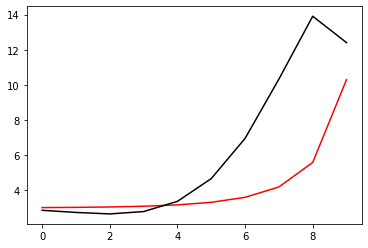

9246 2.1173090270591675 -1.0043948530516977
[ 2.86242193  2.73977502  2.65461924  2.78806448  3.36718038  4.66371191
  6.95175404 10.32960739 13.91557528 12.40945906]


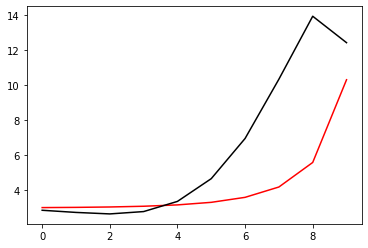

9447 0.12404327793577456 -1.0041450855023948
[ 2.86307388  2.73968564  2.65362138  2.78624598  3.36485728  4.66149446
  6.95072371 10.33192067 13.9255429  12.41563319]


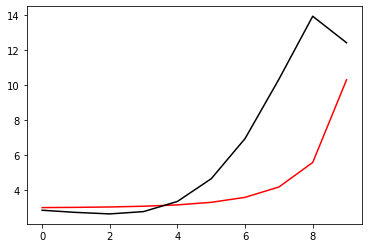

9648 0.12525892320121168 -1.0042112701415866
[ 2.86412004  2.74001327  2.65305717  2.7848699   3.36297228  4.65968897
  6.95004818 10.33450394 13.93569784 12.42194161]


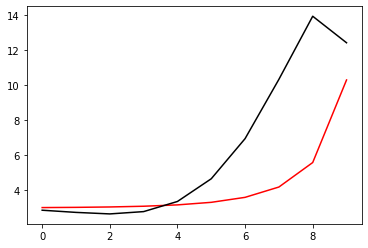

9849 1.1272357939344826 -1.0034813082681202
[ 2.8662963   2.741599    2.65385758  2.78493036  3.36253829  4.65925679
  6.95053921 10.33793437 13.94639029 12.42856384]


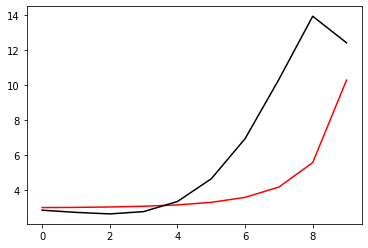

In [96]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

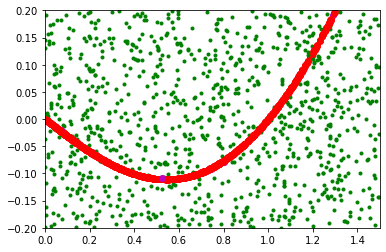

In [98]:
for i in range (10):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2_2, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2_2, Negative[i])
for i in range (10):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()